**Author: [Sudhanshu Singh](https://github.com/sudhanshusinghaiml "Github Profile")**

# Problem Statement

- The data of different types of wine sales in the 20th century is to be analysed. Both Sparkling Wine and Rose Wine data are from the same company. The objective is to analyze the current sales figures to build the most optimum model(s) on the complete data and forecast Wine Sales into the next 12 months future with appropriate confidence intervals/bands.

# I. Importing libraries

In [1]:
import numpy as np      # numpy Array
import pandas as pd     # Pandas
import matplotlib.pyplot as plt  # for plotting the data in Daataframe or Series
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose  # decomposing the time series

from sklearn.linear_model import LinearRegression #For Linear Regression Models
from sklearn.metrics import mean_squared_error #For RMSE of the Models

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
import warnings
warnings.filterwarnings('ignore')

### 1. Read the data as an appropriate Time Series data and plot the data.

**I. Read the data as TimeSeries for Rose Wines**

In [3]:
rose_df = pd.read_csv('Rose.csv')

In [4]:
rose_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [5]:
rose_df.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [6]:
rose_df.tail()

,YearMonth,Rose
182,1995-03,45.0
183,1995-04,52.0
184,1995-05,28.0
185,1995-06,40.0
186,1995-07,62.0


In [15]:
rose_df.isnull().sum()

YearMonth    0
Rose         2
dtype: int64

In [7]:
rose_df.describe(include='all')

,YearMonth,Rose
count,187,185.000000
unique,187,NaN
top,1980-01,NaN
freq,1,NaN
mean,NaN,90.394595
std,NaN,39.175344
min,NaN,28.000000
25%,NaN,63.000000
50%,NaN,86.000000
75%,NaN,112.000000


In [8]:
rose_df = pd.read_csv('Rose.csv', parse_dates=['YearMonth'], index_col= 'YearMonth')

In [9]:
rose_df.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [10]:
rose_df.tail()

,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


In [11]:
# Database dimension
print("Dataset dimension - Rose Wine                          :",rose_df.shape)

#Database size
print("Dataset size - Rose Wine                               :",rose_df.size)

Dataset dimension - Rose Wine                          : (187, 1)
Dataset size - Rose Wine                               : 187


**II. Ploting the actual Monthly Time Series data for Rose Wines**

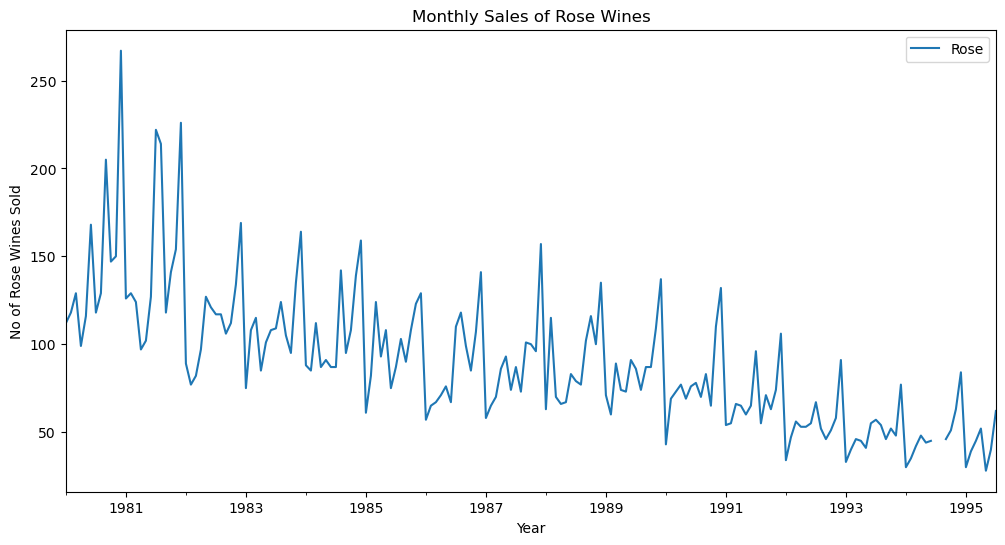

In [12]:
#Increase the figure size
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6

rose_df.plot()

plt.title('Monthly Sales of Rose Wines')
plt.xlabel('Year')
plt.ylabel('No of Rose Wines Sold')
plt.show()

**III. Ploting the Quarterly Time Series data by resampling for Rose Wines**

In [13]:
# Changing the monthly series to quarterly by aggregating.
quarterly_rose_df = rose_df.resample('Q').mean()

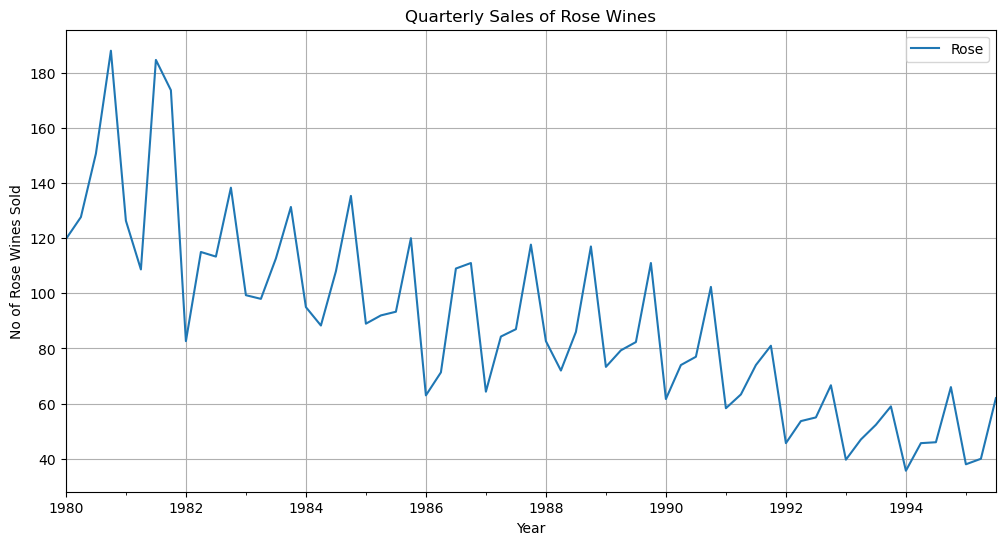

In [14]:
#Increase the figure size
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6

quarterly_rose_df.plot()
plt.title('Quarterly Sales of Rose Wines')
plt.xlabel('Year')
plt.ylabel('No of Rose Wines Sold')

plt.grid()
plt.show()

**IV. Ploting the Yearly Time Series data by resampling for Rose Wines**

In [15]:
# Changing the monthly series to quarterly by aggregating.
yearly_rose_df = rose_df.resample('Y').mean()

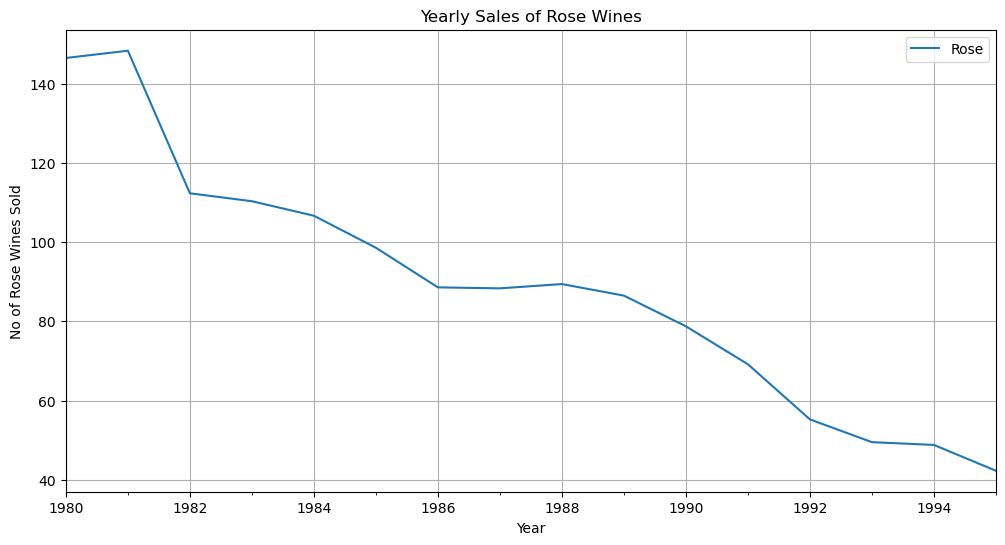

In [16]:
#Increase the figure size
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6

yearly_rose_df.plot()
plt.title('Yearly Sales of Rose Wines')
plt.xlabel('Year')
plt.ylabel('No of Rose Wines Sold')

plt.grid()
plt.show()

**V. Ploting the Daily Time Series data by resampling for Rose Wines**

In [17]:
# Changing the monthly series to quarterly by aggregating.
daily_rose_df = rose_df.resample('D').ffill()

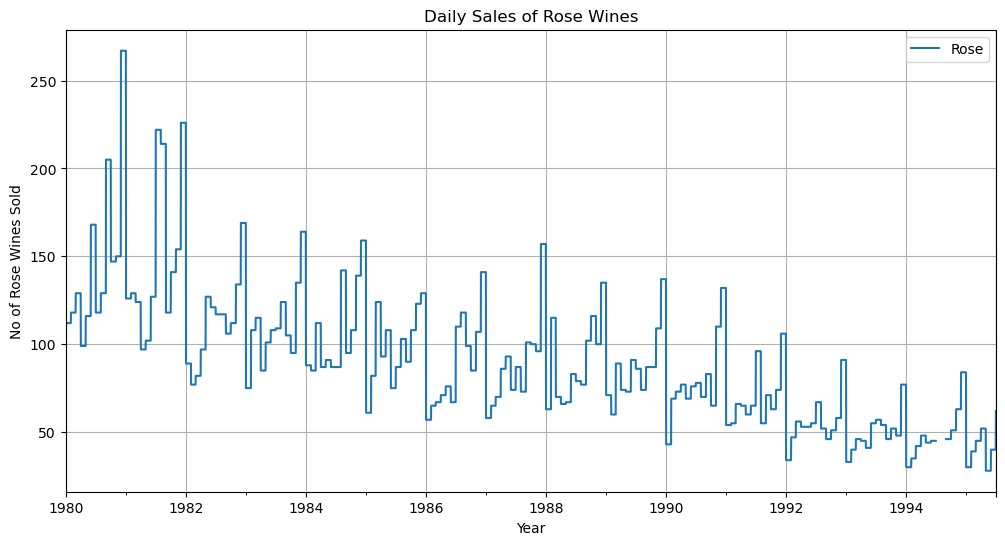

In [18]:
#Increase the figure size
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6

daily_rose_df.plot()
plt.title('Daily Sales of Rose Wines')
plt.xlabel('Year')
plt.ylabel('No of Rose Wines Sold')

plt.grid()
plt.show()

### 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

**I. EDA**

In [19]:
rose_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [20]:
rose_df.describe()

,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


**III. Handling Missing Values**

In [21]:
rose_df.isnull().sum()

Rose    2
dtype: int64

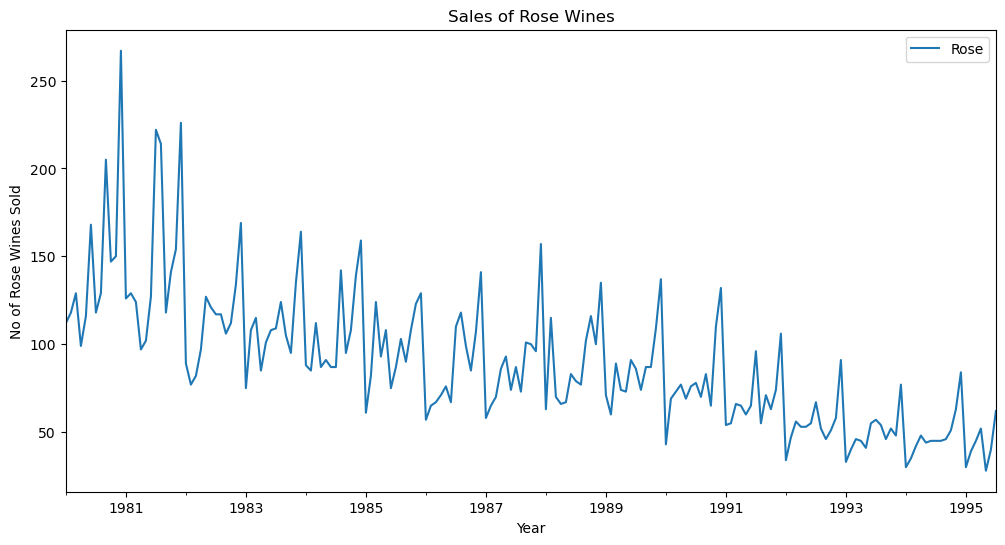

In [22]:
treated_rose_df = rose_df.interpolate(method = 'pad') #, order=2)
treated_rose_df.plot()
plt.title('Sales of Rose Wines')
plt.xlabel('Year')
plt.ylabel('No of Rose Wines Sold')
plt.show()

In [17]:
treated_rose_df.isnull().sum()

Rose    0
dtype: int64

#### Yearly Boxplot

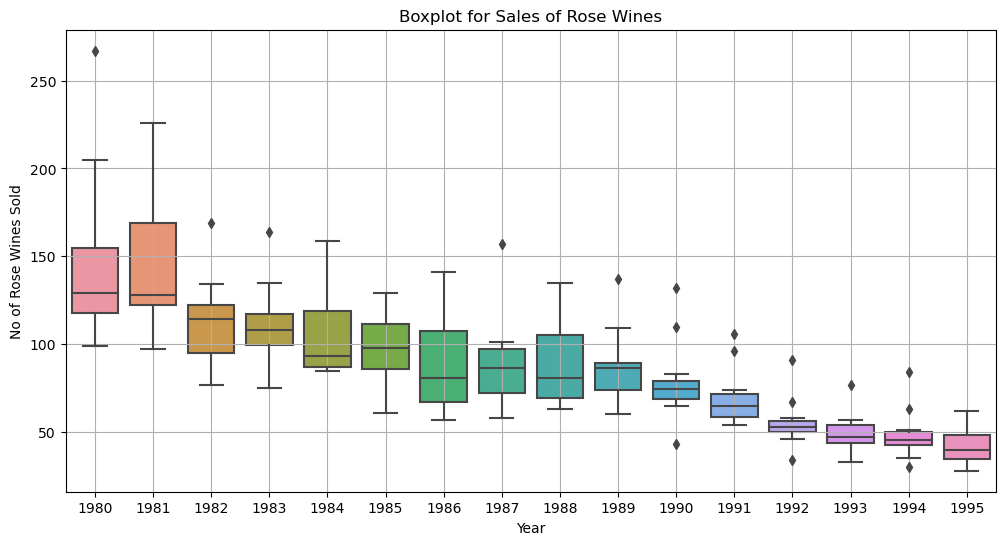

In [25]:
sns.boxplot(x = rose_df.index.year,y = rose_df['Rose'])
plt.title('Boxplot for Sales of Rose Wines')
plt.xlabel('Year')
plt.ylabel('No of Rose Wines Sold')
plt.grid();

### Monthly Boxplot

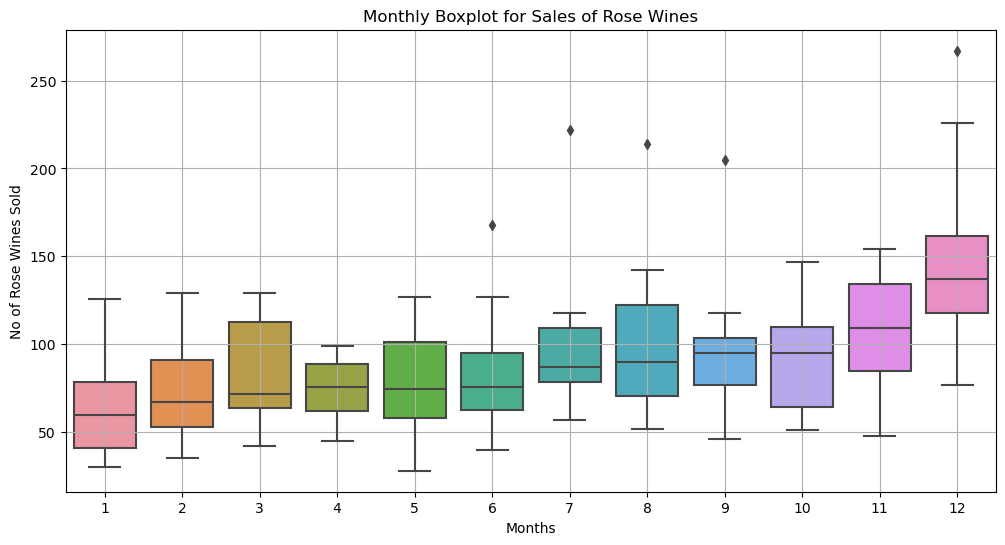

In [26]:
sns.boxplot(x = rose_df.index.month,y = rose_df['Rose'])
plt.title('Monthly Boxplot for Sales of Rose Wines')
plt.xlabel('Months')
plt.ylabel('No of Rose Wines Sold')
plt.grid();

#### Ploting a time series monthplot to understand the spread of Sales across different years and within different months across years.

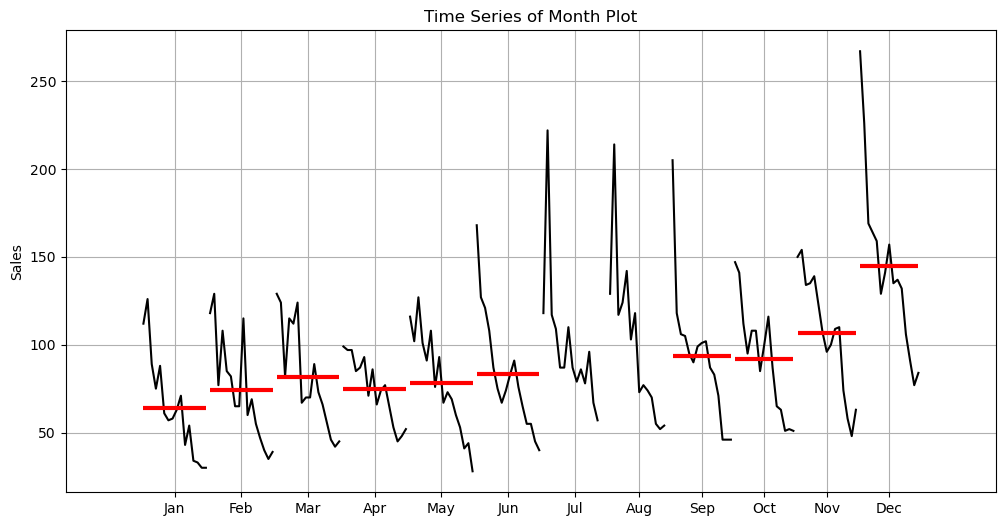

In [27]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(rose_df['Rose'],ylabel='Sales')
plt.title('Time Series of Month Plot')
plt.grid();

### Plot the Empirical Cumulative Distribution.


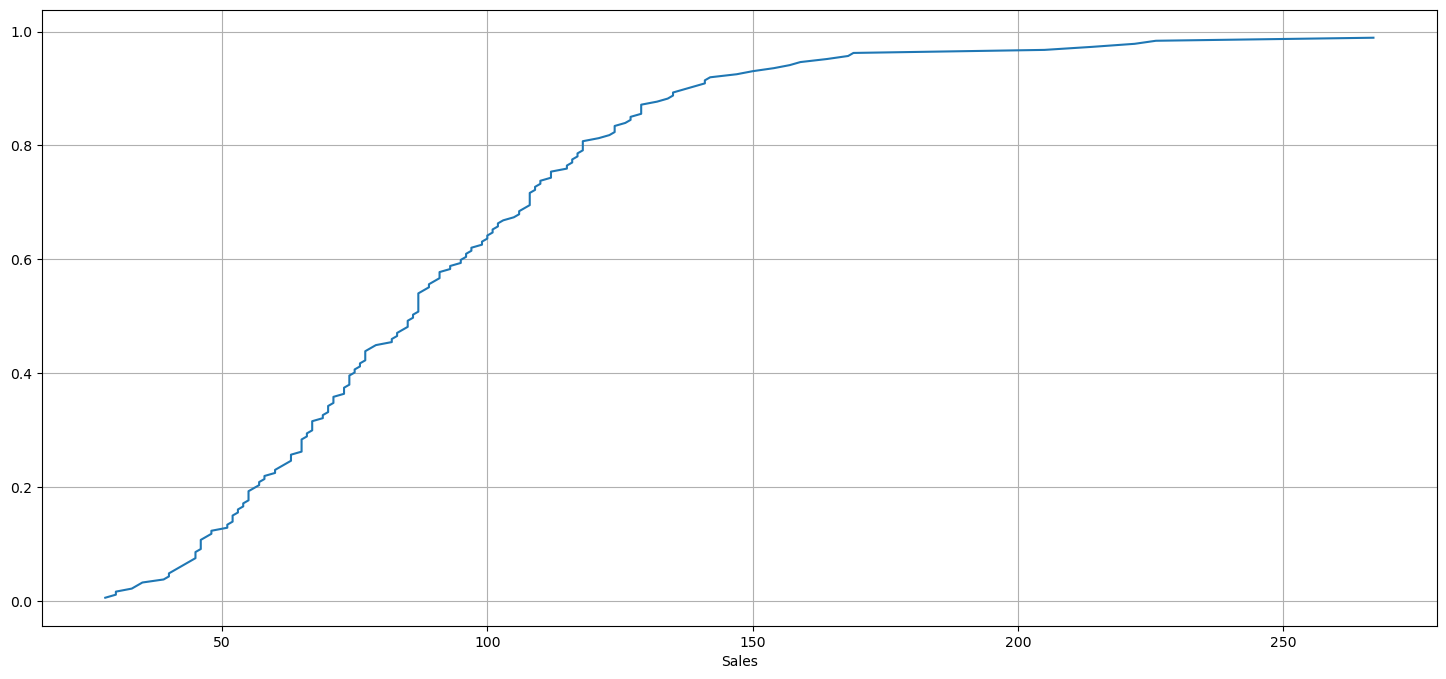

In [28]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(rose_df['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

#### Plot the average Rose Wine per month and the month on month percentage change of Wine Sales.

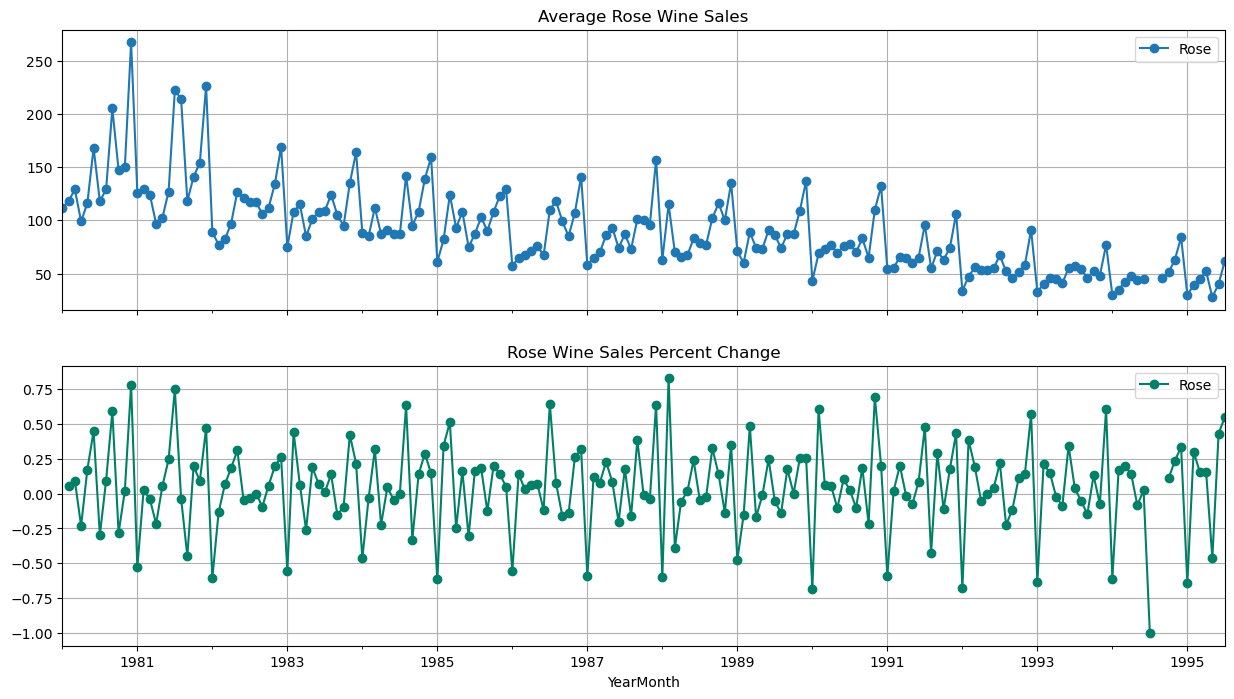

In [29]:
# group by date and get average RetailSales, and precent change
average    = rose_df.groupby(rose_df.index)["Rose"].mean()
pct_change = rose_df.groupby(rose_df.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Rose Wine Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Rose Wine Sales Percent Change",grid=True)

**VI. Yearly Sales across Months for Rose Wines**

In [30]:
rose_yearly_sales_across_all_months = pd.pivot_table(treated_rose_df, values='Rose', columns= rose_df.index.month, 
                                                    index = rose_df.index.year)
rose_yearly_sales_across_all_months

YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.0,129.0,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.0,214.0,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.0,117.0,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.0,124.0,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.0,142.0,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.0,103.0,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.0,118.0,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.0,73.0,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.0,77.0,102.0,116.0,100.0,135.0


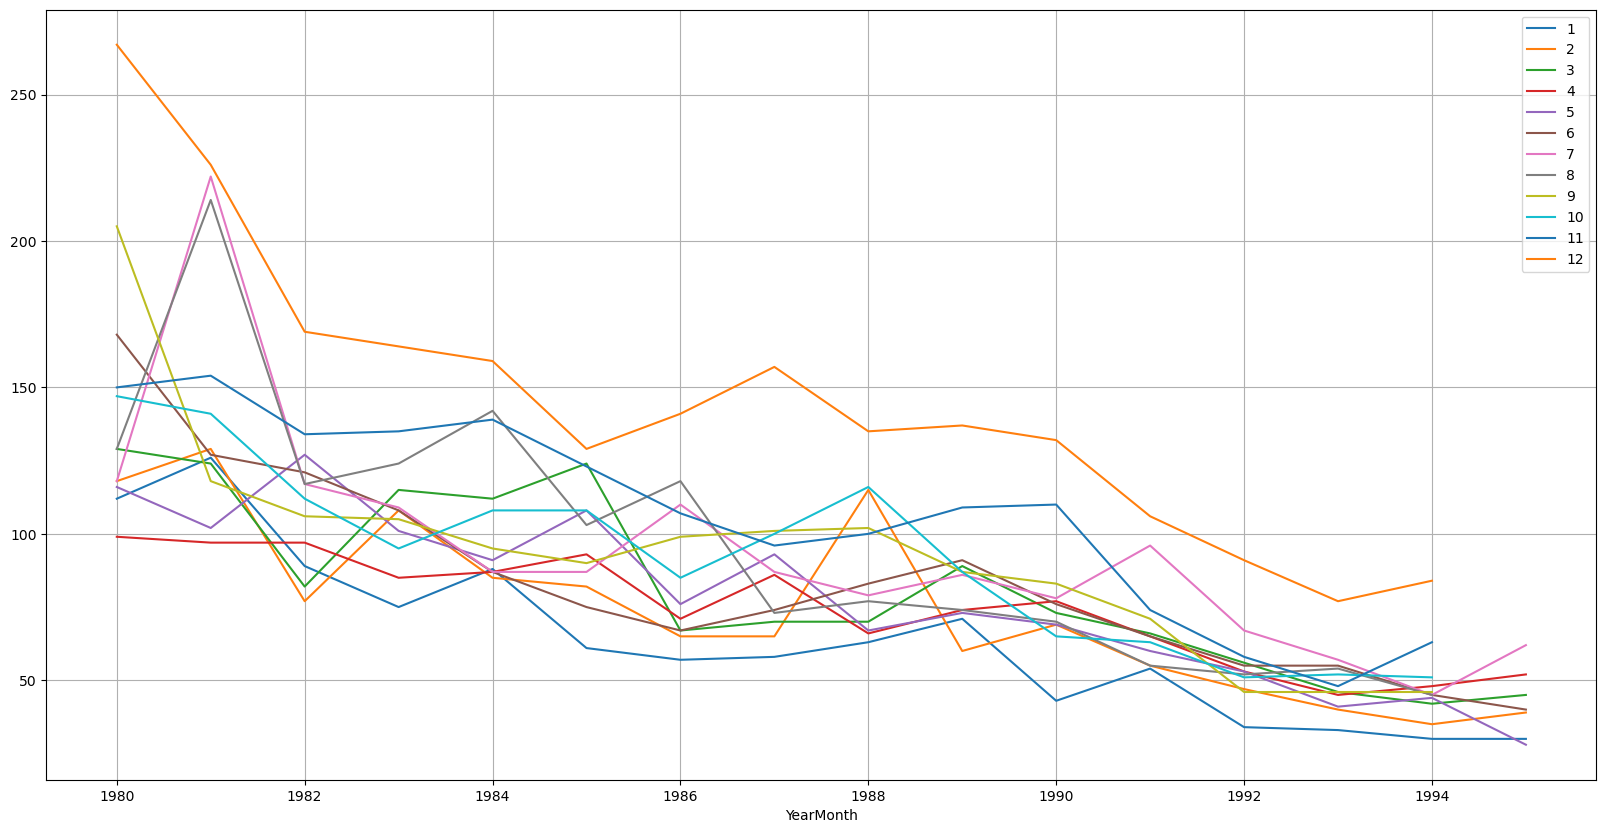

In [31]:
rose_yearly_sales_across_all_months.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

**IV. Decomposing the Time Series Data using Additive Methods**

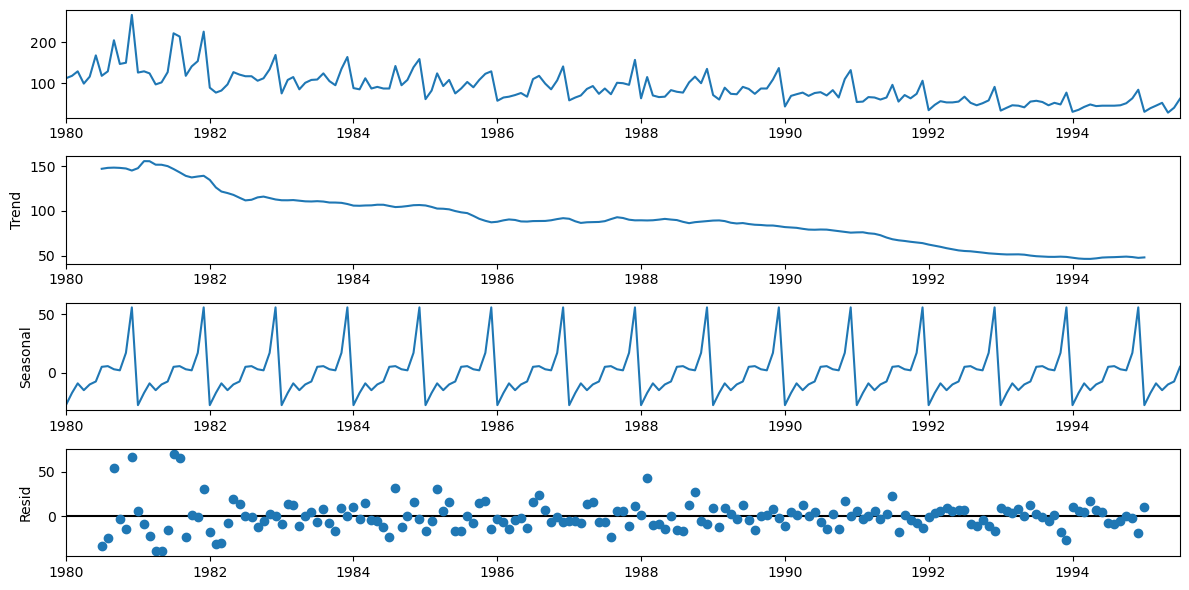

In [34]:
rose_df_additive_decompose = seasonal_decompose(treated_rose_df, model ='additive')
rose_df_additive_decompose.plot()
plt.show()

In [35]:
trend = rose_df_additive_decompose.trend
seasonality = rose_df_additive_decompose.seasonal
residual = rose_df_additive_decompose.resid

In [36]:
print('Trend','\n',trend.round(2).head(10),'\n')
print('Seasonality','\n',seasonality.round(2).head(10),'\n')
print('Residual','\n',residual.round(2).head(10),'\n')

Trend 
 YearMonth
1980-01-01       NaN
1980-02-01       NaN
1980-03-01       NaN
1980-04-01       NaN
1980-05-01       NaN
1980-06-01       NaN
1980-07-01    147.08
1980-08-01    148.12
1980-09-01    148.37
1980-10-01    148.08
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -27.90
1980-02-01   -17.43
1980-03-01    -9.28
1980-04-01   -15.09
1980-05-01   -10.19
1980-06-01    -7.67
1980-07-01     4.88
1980-08-01     5.46
1980-09-01     2.78
1980-10-01     1.88
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01      NaN
1980-02-01      NaN
1980-03-01      NaN
1980-04-01      NaN
1980-05-01      NaN
1980-06-01      NaN
1980-07-01   -33.96
1980-08-01   -24.59
1980-09-01    53.84
1980-10-01    -2.96
Name: resid, dtype: float64 



**V. Decomposing the Time Series Data using Multiplicative Methods**

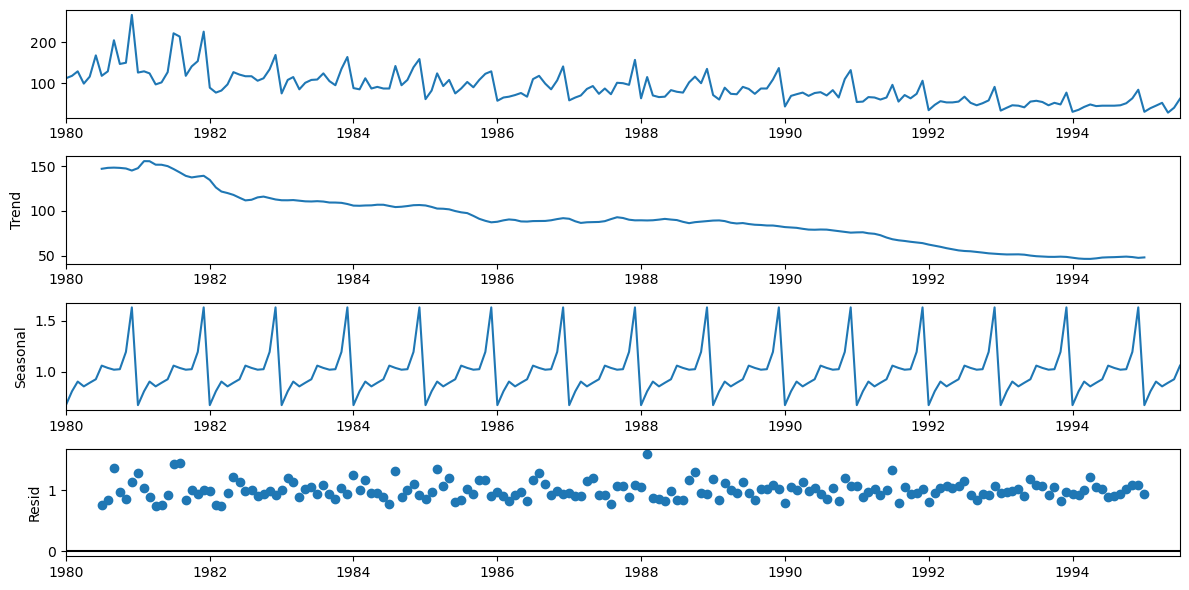

In [37]:
rose_df_multiplicative_decompose = seasonal_decompose(treated_rose_df, model ='multiplicative')
rose_df_multiplicative_decompose.plot()
plt.show()

In [38]:
trend = rose_df_multiplicative_decompose.trend
seasonality = rose_df_multiplicative_decompose.seasonal
residual = rose_df_multiplicative_decompose.resid

In [39]:
print('Trend','\n',trend.round(2).head(10),'\n')
print('Seasonality','\n',seasonality.round(2).head(10),'\n')
print('Residual','\n',residual.round(2).head(10),'\n')

Trend 
 YearMonth
1980-01-01       NaN
1980-02-01       NaN
1980-03-01       NaN
1980-04-01       NaN
1980-05-01       NaN
1980-06-01       NaN
1980-07-01    147.08
1980-08-01    148.12
1980-09-01    148.37
1980-10-01    148.08
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.67
1980-02-01    0.81
1980-03-01    0.90
1980-04-01    0.85
1980-05-01    0.89
1980-06-01    0.92
1980-07-01    1.06
1980-08-01    1.04
1980-09-01    1.02
1980-10-01    1.02
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01     NaN
1980-02-01     NaN
1980-03-01     NaN
1980-04-01     NaN
1980-05-01     NaN
1980-06-01     NaN
1980-07-01    0.76
1980-08-01    0.84
1980-09-01    1.36
1980-10-01    0.97
Name: resid, dtype: float64 



### 3. Split the data into training and test. The test data should start in 1991.

In [40]:
train = treated_rose_df.loc[treated_rose_df.index.year<1991]
test = treated_rose_df.loc[treated_rose_df.index.year>=1991]

In [41]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
              Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0 

Last few rows of Training Data 
              Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0 

First few rows of Test Data 
             Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0 

Last few rows of Test Data 
             Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0 



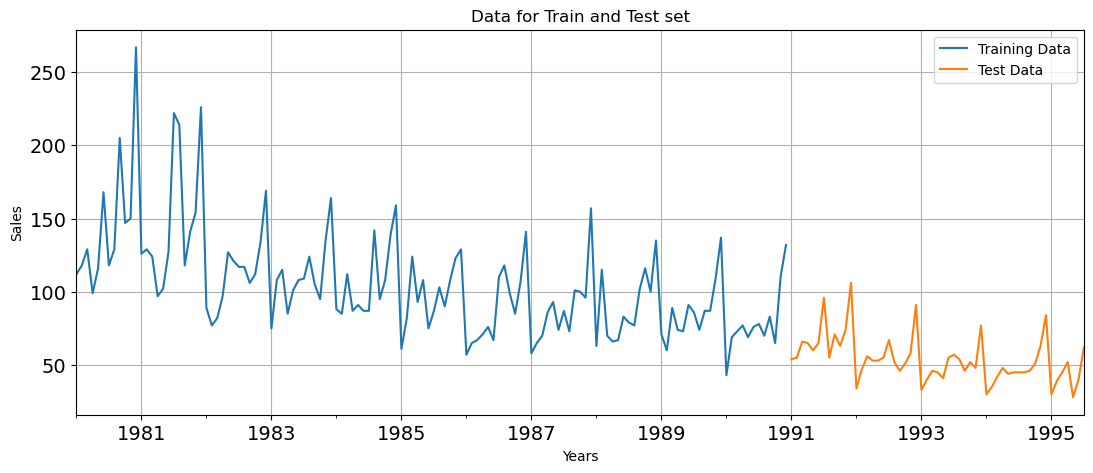

In [45]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.title('Data for Train and Test set')
plt.ylabel('Sales')
plt.xlabel('Years')
plt.show()

### 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE

### **I. Linear Regression**

- For this particular linear regression, we are going to regress the 'Sales' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [46]:
rose_train_time = [i+1 for i in range(len(train))]
rose_test_time = [i+43 for i in range(len(test))]
print('Training Time instance','\n',rose_train_time)
print('Test Time instance','\n',rose_test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


**We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.**

In [47]:
Rose_LinearRegression_train = train.copy()
Rose_LinearRegression_test = test.copy()

Rose_LinearRegression_train['time'] = rose_train_time
Rose_LinearRegression_test['time'] = rose_test_time

print('First few rows of Training Data','\n',Rose_LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',Rose_LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',Rose_LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',Rose_LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5 

Last few rows of Training Data 
              Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132 

First few rows of Test Data 
             Rose  time
YearMonth             
1991-01-01  54.0    43
1991-02-01  55.0    44
1991-03-01  66.0    45
1991-04-01  65.0    46
1991-05-01  60.0    47 

Last few rows of Test Data 
             Rose  time
YearMonth             
1995-03-01  45.0    93
1995-04-01  52.0    94
1995-05-01  28.0    95
1995-06-01  40.0    96
1995-07-01  62.0    97 



In [49]:
rose_lr_regression = LinearRegression()
rose_lr_regression.fit(Rose_LinearRegression_train[['time']], Rose_LinearRegression_train['Rose'].values)

LinearRegression()

In [50]:
rose_linearregression_test_prediction = rose_lr_regression.predict(Rose_LinearRegression_test[['time']])
Rose_LinearRegression_test['RegOnTime'] = rose_linearregression_test_prediction

## Test Data - RMSE
RMSE_rose_model_01 = mean_squared_error(test['Rose'],rose_linearregression_test_prediction,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.2f" %(RMSE_rose_model_01))

RMSE_df = pd.DataFrame({'Test RMSE': [RMSE_rose_model_01]},index=['Linear Regression OnTime'])
RMSE_df

For RegressionOnTime forecast on the Test Data,  RMSE is 51.45


,Test RMSE
Linear Regression OnTime,51.45105


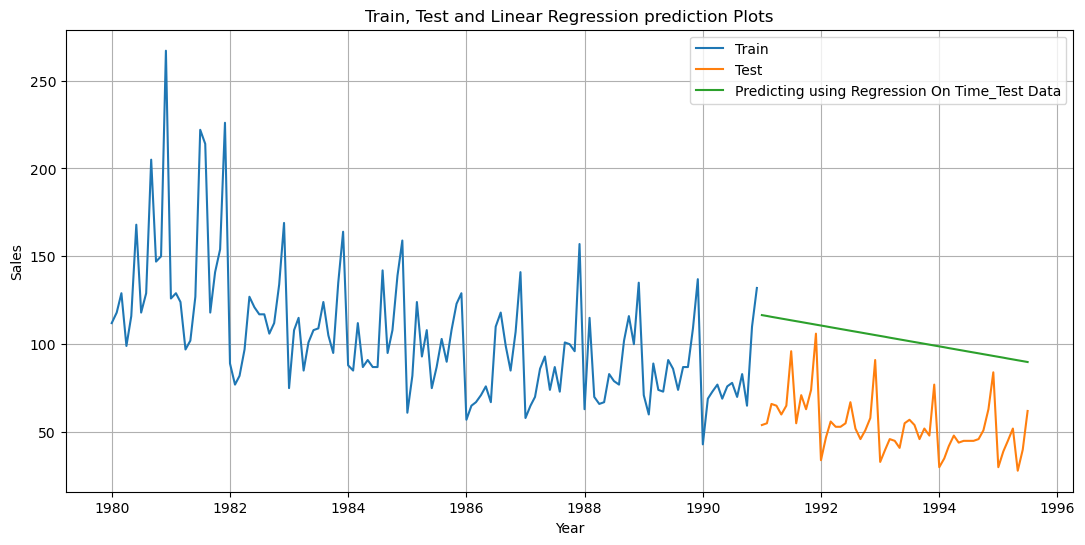

In [54]:
plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(Rose_LinearRegression_test['RegOnTime'], label='Predicting using Regression On Time_Test Data')
plt.legend(loc='best')
plt.title('Train, Test and Linear Regression prediction Plots')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid();

### **II. Moving Average(MA)**

- For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

- For Moving Average, we are going to average over the entire data.

In [56]:
Rose_MovingAverage_train = train.copy()
Rose_MovingAverage_test = test.copy()

In [57]:
Rose_MovingAverage_train['Trailing_2'] = Rose_MovingAverage_train['Rose'].rolling(2).mean()
Rose_MovingAverage_train['Trailing_4'] = Rose_MovingAverage_train['Rose'].rolling(4).mean()
Rose_MovingAverage_train['Trailing_6'] = Rose_MovingAverage_train['Rose'].rolling(6).mean()
Rose_MovingAverage_train['Trailing_9'] = Rose_MovingAverage_train['Rose'].rolling(9).mean()
Rose_MovingAverage_train.head(10)

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,112.0,NaN,NaN,NaN,NaN
1980-02-01,118.0,115.0,NaN,NaN,NaN
1980-03-01,129.0,123.5,NaN,NaN,NaN
1980-04-01,99.0,114.0,114.50,NaN,NaN
1980-05-01,116.0,107.5,115.50,NaN,NaN
1980-06-01,168.0,142.0,128.00,123.666667,NaN
1980-07-01,118.0,143.0,125.25,124.666667,NaN
1980-08-01,129.0,123.5,132.75,126.500000,NaN
1980-09-01,205.0,167.0,155.00,139.166667,132.666667


In [58]:
Rose_MovingAverage_test['Trailing_2'] = Rose_MovingAverage_train.iloc[-2:]['Rose'].mean()
Rose_MovingAverage_test['Trailing_4'] = Rose_MovingAverage_train.iloc[-4:]['Rose'].mean()
Rose_MovingAverage_test['Trailing_6'] = Rose_MovingAverage_train.iloc[-6:]['Rose'].mean()
Rose_MovingAverage_test['Trailing_9'] = Rose_MovingAverage_train.iloc[-9:]['Rose'].mean()

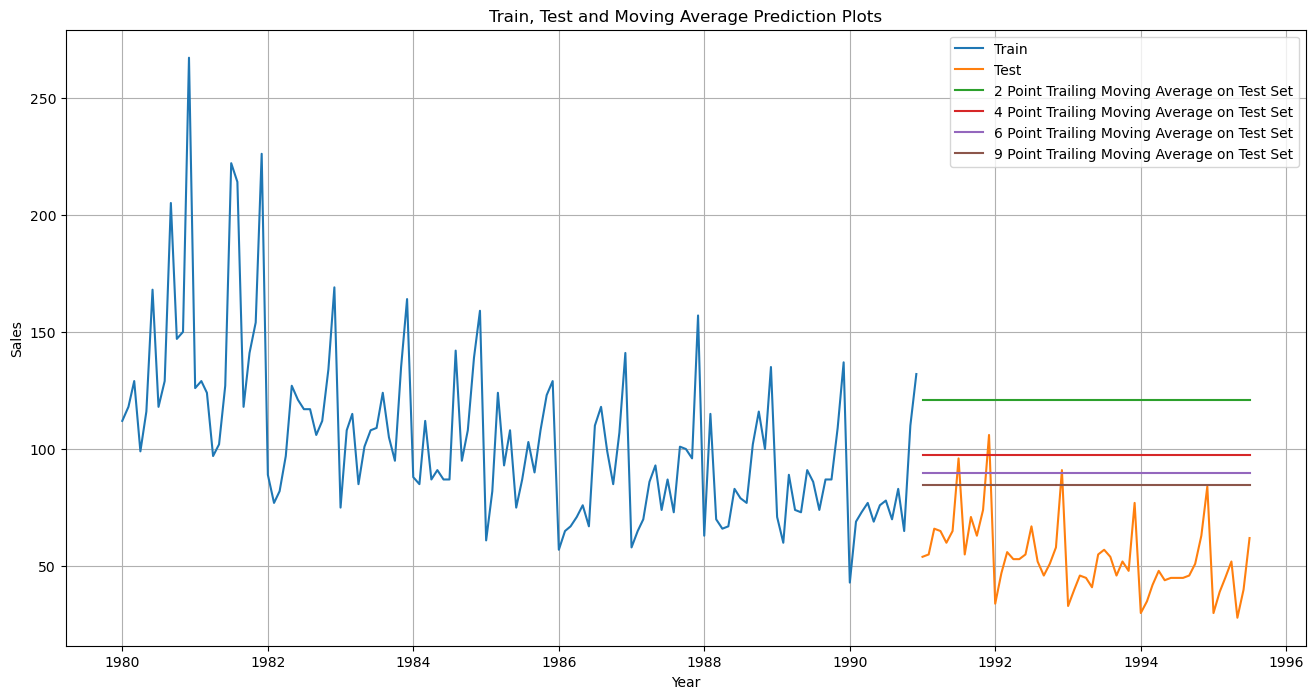

In [59]:
## Plotting on Test data

plt.figure(figsize=(16,8))
plt.plot(Rose_MovingAverage_train['Rose'], label='Train')
plt.plot(Rose_MovingAverage_test['Rose'], label='Test')
plt.plot(Rose_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(Rose_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(Rose_MovingAverage_test['Trailing_6'], label='6 Point Trailing Moving Average on Test Set')
plt.plot(Rose_MovingAverage_test['Trailing_9'], label='9 Point Trailing Moving Average on Test Set')
plt.title('Train, Test and Moving Average Prediction Plots')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(loc = 'best')
plt.grid();

In [60]:
## Test Data - RMSE --> 2 point Trailing MA

RMSE_rose_model_02 = mean_squared_error(test['Rose'],Rose_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(RMSE_rose_model_02))

## Test Data - RMSE  --> 4 point Trailing MA

RMSE_rose_model_03 = mean_squared_error(test['Rose'],Rose_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(RMSE_rose_model_03))

## Test Data - RMSE --> 6 point Trailing MA

RMSE_rose_model_04 = mean_squared_error(test['Rose'],Rose_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(RMSE_rose_model_04))

## Test Data - RMSE  --> 9 point Trailing MA

RMSE_rose_model_05 = mean_squared_error(test['Rose'],Rose_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(RMSE_rose_model_05))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 68.990
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 46.424
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 39.147
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 34.432 


In [61]:
RMSE_moving_average_df = pd.DataFrame({'Test RMSE': [RMSE_rose_model_02,RMSE_rose_model_03, RMSE_rose_model_04, RMSE_rose_model_05]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

RMSE_df = pd.concat([RMSE_df, RMSE_moving_average_df])
RMSE_df

,Test RMSE
Linear Regression OnTime,51.451050
2pointTrailingMovingAverage,68.990118
4pointTrailingMovingAverage,46.424083
6pointTrailingMovingAverage,39.147068
9pointTrailingMovingAverage,34.431627


### **III. Naive Forecasts**

- For naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [62]:
Rose_NaiveModel_train = train.copy()
Rose_NaiveModel_test = test.copy()

print(Rose_NaiveModel_train.head())
print('\n')
print(Rose_NaiveModel_test.head())

             Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0


            Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0


In [63]:
Rose_NaiveModel_test['naive'] = np.asarray(Rose_NaiveModel_train['Rose'])[len(np.asarray(Rose_NaiveModel_train['Rose']))-1]
Rose_NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

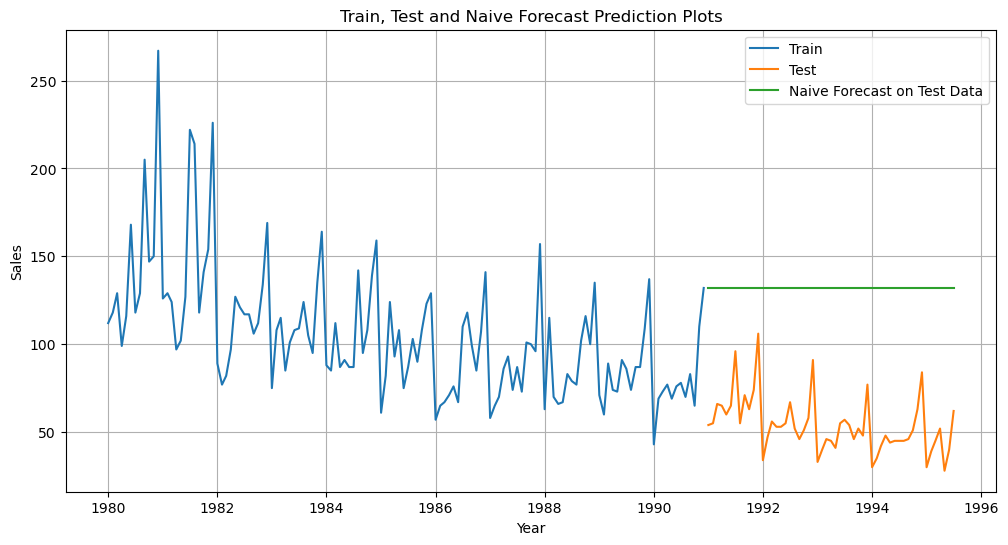

In [65]:
plt.plot(Rose_NaiveModel_train['Rose'], label='Train')
plt.plot(Rose_NaiveModel_test['Rose'], label='Test')

plt.plot(Rose_NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title('Train, Test and Naive Forecast Prediction Plots')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid();

In [66]:
RMSE_rose_model_06 = mean_squared_error(Rose_NaiveModel_test['Rose'],Rose_NaiveModel_test['naive'],squared=False)
print("For Naive Approach forecast on the Test Data,  RMSE is %3.3f " %(RMSE_rose_model_06))

For Naive Approach forecast on the Test Data,  RMSE is 79.739 


In [67]:
RMSE_naive_df = pd.DataFrame({'Test RMSE': [RMSE_rose_model_06]}
                           ,index=['Naive Approach'])

RMSE_df = pd.concat([RMSE_df, RMSE_naive_df])
RMSE_df

,Test RMSE
Linear Regression OnTime,51.451050
2pointTrailingMovingAverage,68.990118
4pointTrailingMovingAverage,46.424083
6pointTrailingMovingAverage,39.147068
9pointTrailingMovingAverage,34.431627
Naive Approach,79.738550


### **IV. Simple Average Forecast**

- For this particular simple average method, we will forecast by using the average of the training values.

In [68]:
Rose_SimpleAverage_train = train.copy()
Rose_SimpleAverage_test = test.copy()

print(Rose_SimpleAverage_train.head())
print('\n')
print(Rose_SimpleAverage_test.head())

             Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0


            Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0


In [69]:
Rose_SimpleAverage_test['mean_forecast'] = Rose_SimpleAverage_train['Rose'].mean()
Rose_SimpleAverage_test.head()

,Rose,mean_forecast
YearMonth,,
1991-01-01,54.0,104.939394
1991-02-01,55.0,104.939394
1991-03-01,66.0,104.939394
1991-04-01,65.0,104.939394
1991-05-01,60.0,104.939394


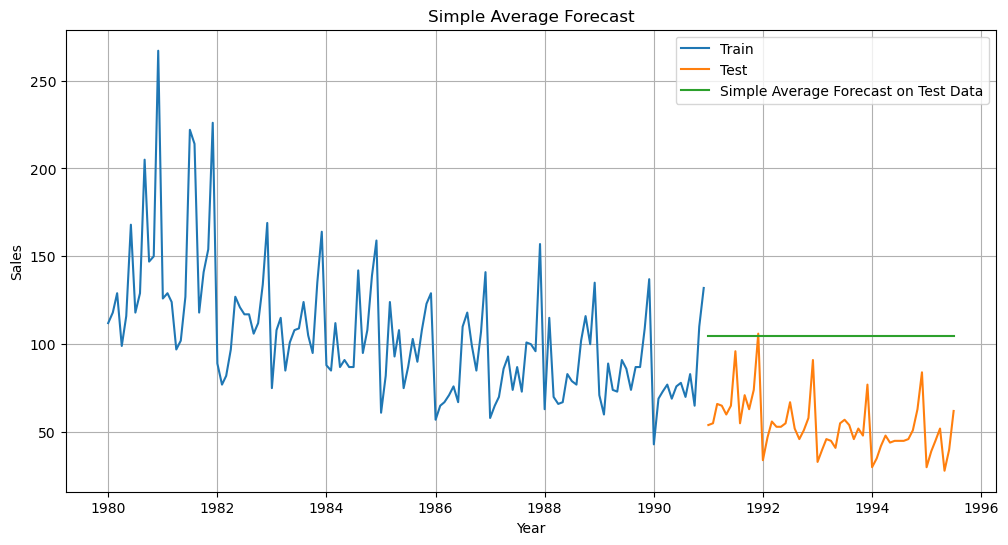

In [71]:
plt.plot(Rose_SimpleAverage_train['Rose'], label='Train')
plt.plot(Rose_SimpleAverage_test['Rose'], label='Test')

plt.plot(Rose_SimpleAverage_test['mean_forecast'], label='Simple Average Forecast on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid();

In [72]:
RMSE_rose_model_07 = mean_squared_error(Rose_SimpleAverage_test['Rose'],Rose_SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f " %(RMSE_rose_model_07))

For Simple Average forecast on the Test Data,  RMSE is 53.481 


In [73]:
RMSE_SimpleAverage_df = pd.DataFrame({'Test RMSE': [RMSE_rose_model_07]}
                           ,index=['Simple Average Approach'])

RMSE_df = pd.concat([RMSE_df, RMSE_SimpleAverage_df])
RMSE_df

,Test RMSE
Linear Regression OnTime,51.451050
2pointTrailingMovingAverage,68.990118
4pointTrailingMovingAverage,46.424083
6pointTrailingMovingAverage,39.147068
9pointTrailingMovingAverage,34.431627
Naive Approach,79.738550
Simple Average Approach,53.480857


### **V. Simple Exponential Smothing**

In [74]:
Rose_SES_train = train.copy()
Rose_SES_test = test.copy()

Rose_SES_model = SimpleExpSmoothing(Rose_SES_train['Rose'])
Rose_SES_model_autofit = Rose_SES_model.fit(optimized=True)
print(Rose_SES_model_autofit.params)

{'smoothing_level': 0.09874995336438987, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 134.38681121931316, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [75]:
Rose_SES_test['predict'] = Rose_SES_model_autofit.forecast(steps=len(test))
Rose_SES_test.head()

,Rose,predict
YearMonth,,
1991-01-01,54.0,87.105001
1991-02-01,55.0,87.105001
1991-03-01,66.0,87.105001
1991-04-01,65.0,87.105001
1991-05-01,60.0,87.105001


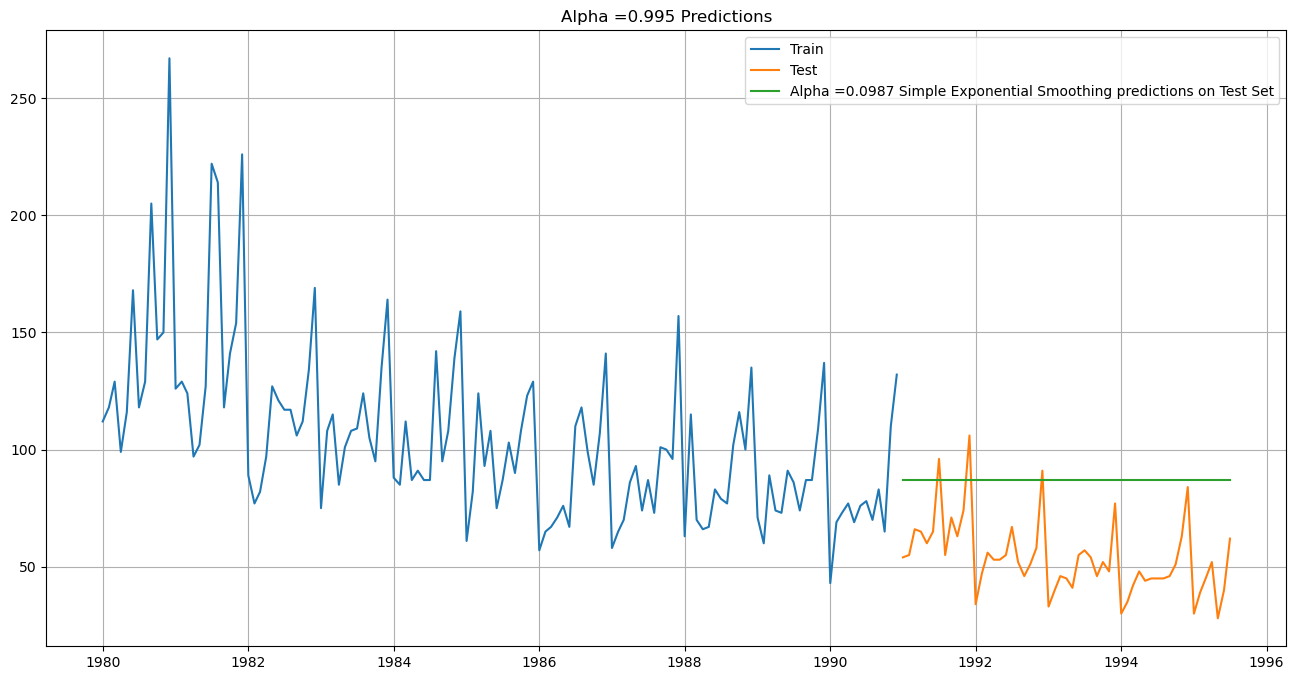

In [76]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(Rose_SES_train['Rose'], label='Train')
plt.plot(Rose_SES_test['Rose'], label='Test')

plt.plot(Rose_SES_test['predict'], label='Alpha =0.0987 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

In [77]:
## Test Data

RMSE_rose_model_08 = mean_squared_error(Rose_SES_test['Rose'],Rose_SES_test['predict'],squared=False)
print("For Alpha =0.0987 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(RMSE_rose_model_08))

For Alpha =0.0987 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.817


In [78]:
RMSE_Rose_SES_df = pd.DataFrame({'Test RMSE': [RMSE_rose_model_08]}
                           ,index=['Alpha=0.0987,Simple Exponential Smoothing'])

RMSE_df = pd.concat([RMSE_df, RMSE_Rose_SES_df])
RMSE_df

,Test RMSE
Linear Regression OnTime,51.451050
2pointTrailingMovingAverage,68.990118
4pointTrailingMovingAverage,46.424083
6pointTrailingMovingAverage,39.147068
9pointTrailingMovingAverage,34.431627
Naive Approach,79.738550
Simple Average Approach,53.480857
"Alpha=0.0987,Simple Exponential Smoothing",36.816905


#### Setting different alpha values.

**The higher the alpha, the more weightagefor the recent observation. That means, what happened recently will happen again.We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.**

In [79]:
## First we will define an empty dataframe to store our values from the loop
resultsDf_SES_09 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_SES_09

,Alpha Values,Train RMSE,Test RMSE


In [80]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = Rose_SES_model.fit(smoothing_level=i,optimized=False,use_brute=True)
    Rose_SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    Rose_SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    
    rmse_model_train_i = mean_squared_error(Rose_SES_train['Rose'],Rose_SES_train['predict',i],squared=False)
    
    rmse_model_test_i = mean_squared_error(Rose_SES_test['Rose'],Rose_SES_test['predict',i],squared=False)
    
    resultsDf_SES_09 = resultsDf_SES_09.append({'Alpha Values':i,'Train RMSE':rmse_model_train_i 
                                                ,'Test RMSE':rmse_model_test_i}, ignore_index=True)

In [81]:
resultsDf_SES_09.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Test RMSE
0,0.3,32.470164,47.525251
1,0.4,33.035130,53.787686
2,0.5,33.682839,59.661932
3,0.6,34.441171,64.991324
4,0.7,35.323261,69.718108
5,0.8,36.334596,73.793865
6,0.9,37.482782,77.159094


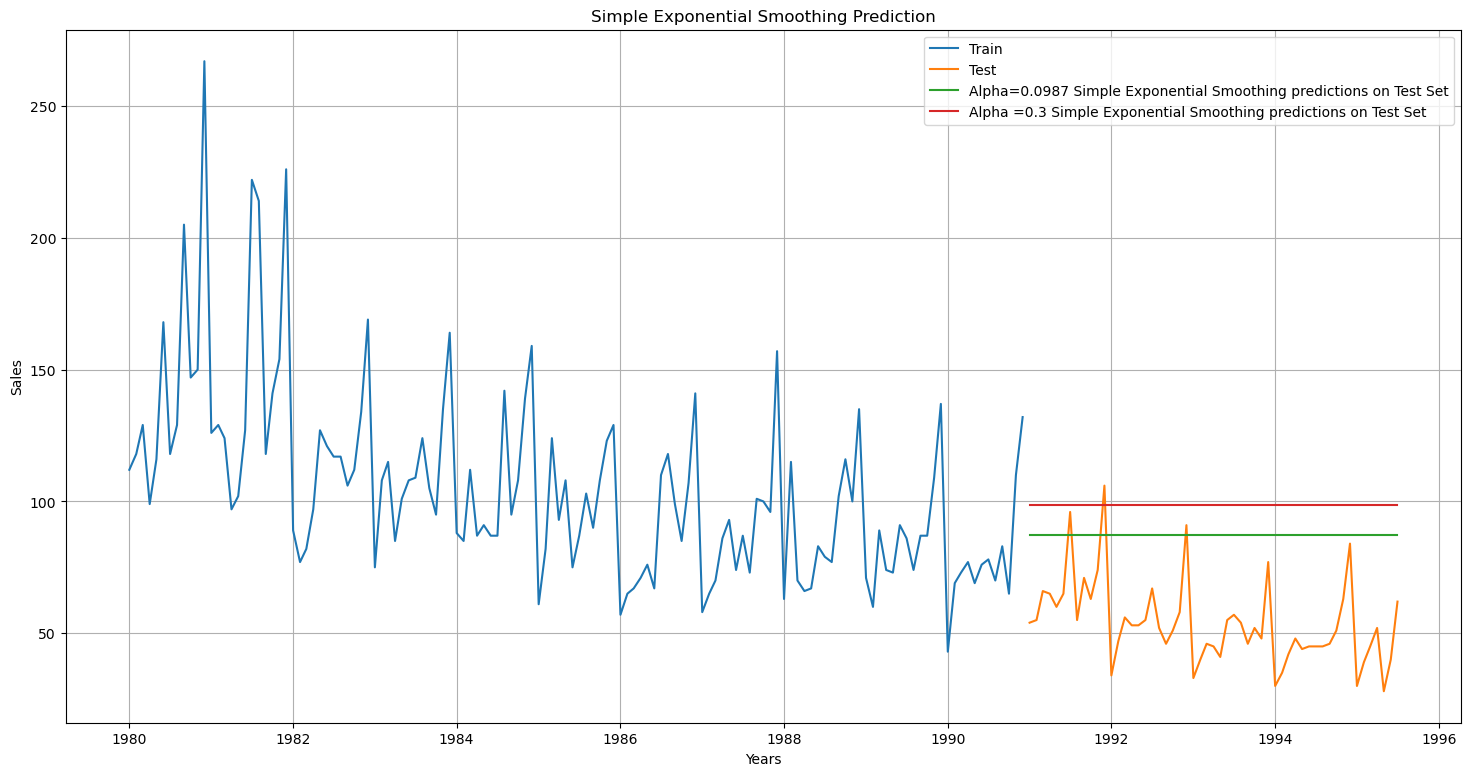

In [82]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(Rose_SES_train['Rose'], label='Train')
plt.plot(Rose_SES_test['Rose'], label='Test')

plt.plot(Rose_SES_test['predict'], label='Alpha=0.0987 Simple Exponential Smoothing predictions on Test Set')

plt.plot(Rose_SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')
plt.title('Simple Exponential Smoothing Prediction')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.grid();

In [64]:
RMSE_Rose_SES_df = pd.DataFrame({'Test RMSE': resultsDf_SES_09.sort_values(by=['Test RMSE'],ascending=True).values[0][2]}
                           ,index=['Alpha=0.3,Simple Exponential Smoothing'])

RMSE_df = pd.concat([RMSE_df, RMSE_Rose_SES_df])
RMSE_df

,Test RMSE
Linear Regression OnTime,51.451050
2pointTrailingMovingAverage,68.990118
4pointTrailingMovingAverage,46.424083
6pointTrailingMovingAverage,39.147068
9pointTrailingMovingAverage,34.431627
Naive Approach,79.738550
Simple Average Approach,53.480857
"Alpha=0.0987,Simple Exponential Smoothing",36.816905
"Alpha=0.3,Simple Exponential Smoothing",47.525251


### VI. Double Exponential Smoothing (Holt's Model)

##### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

In [83]:
Rose_DES_train = train.copy()
Rose_DES_test = test.copy()

Rose_DES_model = Holt(Rose_DES_train['Rose'])
Rose_DES_model_autofit = Rose_DES_model.fit(optimized=True)
print(Rose_DES_model_autofit.params)

{'smoothing_level': 0.12981260063088668, 'smoothing_trend': 0.05376220098709802, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 145.73070601479063, 'initial_trend': -0.10069596155782001, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [84]:
Rose_DES_test['predict'] = Rose_DES_model_autofit.forecast(steps=len(test))
Rose_DES_test.head()

,Rose,predict
YearMonth,,
1991-01-01,54.0,86.161875
1991-02-01,55.0,86.247204
1991-03-01,66.0,86.332532
1991-04-01,65.0,86.417860
1991-05-01,60.0,86.503188


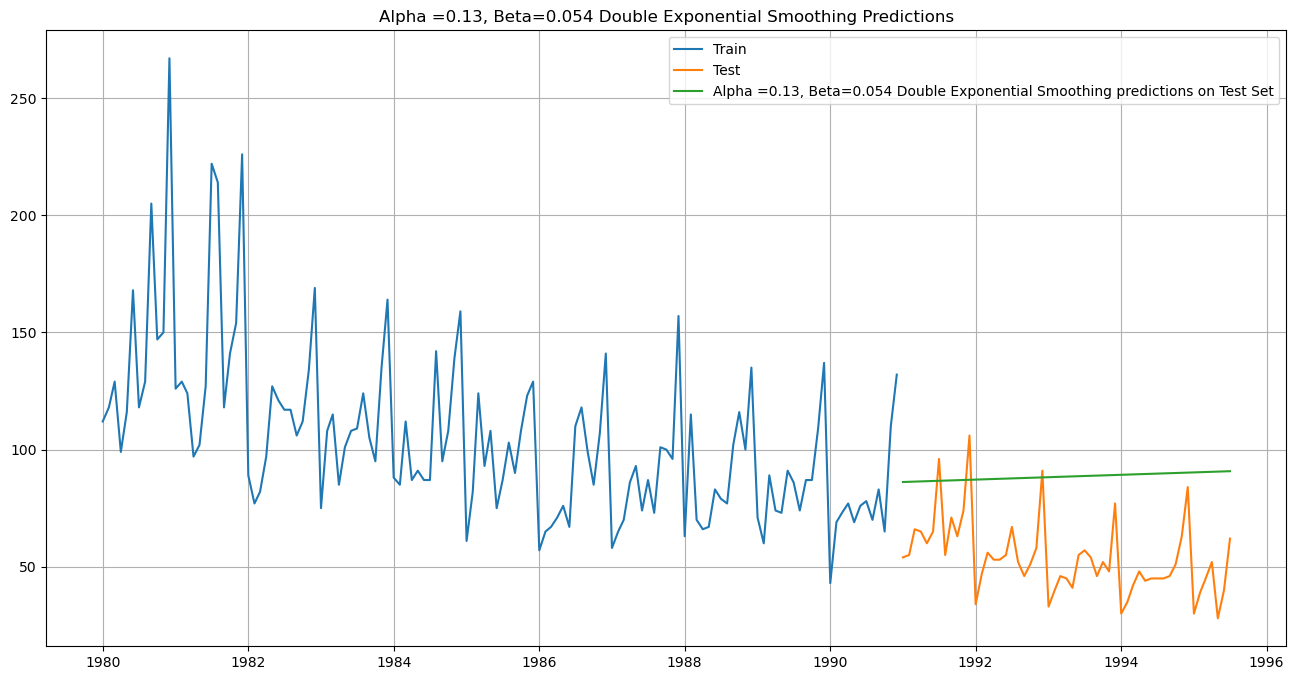

In [85]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(Rose_DES_train['Rose'], label='Train')
plt.plot(Rose_DES_test['Rose'], label='Test')

plt.plot(Rose_DES_test['predict'], label='Alpha =0.13, Beta=0.054 Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.13, Beta=0.054 Double Exponential Smoothing Predictions');

In [86]:
## Test Data

RMSE_rose_model_10 = mean_squared_error(Rose_SES_test['Rose'],Rose_SES_test['predict'],squared=False)
print("For Alpha=0.13, Beta=0.054 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(RMSE_rose_model_10))

For Alpha=0.13, Beta=0.054 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 36.817


In [87]:
RMSE_Rose_DES_df = pd.DataFrame({'Test RMSE': [RMSE_rose_model_10]}
                           ,index=['Alpha =0.13, Beta=0.054, Double Exponential Smoothing'])

RMSE_df = pd.concat([RMSE_df, RMSE_Rose_DES_df])
RMSE_df

,Test RMSE
Linear Regression OnTime,51.451050
2pointTrailingMovingAverage,68.990118
4pointTrailingMovingAverage,46.424083
6pointTrailingMovingAverage,39.147068
9pointTrailingMovingAverage,34.431627
Naive Approach,79.738550
Simple Average Approach,53.480857
"Alpha=0.0987,Simple Exponential Smoothing",36.816905
"Alpha =0.13, Beta=0.054, Double Exponential Smoothing",36.816905


#### Setting different alpha and beta values.

**The higher the alpha, the more weightage for the recent observation. That means, what happened recently will happen again.We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.**

In [88]:
## First we will define an empty dataframe to store our values from the loop
resultsDf_DES_11 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_DES_11

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [89]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = Rose_DES_model.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        Rose_DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        Rose_DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
        
        rmse_model_train_i_j = mean_squared_error(Rose_DES_train['Rose'],Rose_DES_train['predict',i,j],squared=False)
        
        rmse_model_test_i_j = mean_squared_error(Rose_DES_test['Rose'],Rose_DES_test['predict',i,j],squared=False)
        
        resultsDf_DES_11 = resultsDf_DES_11.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model_train_i_j
                                                    ,'Test RMSE':rmse_model_test_i_j}, ignore_index=True)

In [90]:
resultsDf_DES_11.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.3,0.3,35.944983,265.591922
8,0.4,0.3,36.749123,339.330850
1,0.3,0.4,37.393239,358.775361
16,0.5,0.3,37.433314,394.296935
24,0.6,0.3,38.348984,439.320331
...,...,...,...,...
46,0.8,0.9,51.756649,1052.489279
38,0.7,0.9,48.539838,1061.872441
47,0.8,1.0,53.844112,1095.136777
31,0.6,1.0,47.190957,1102.110345


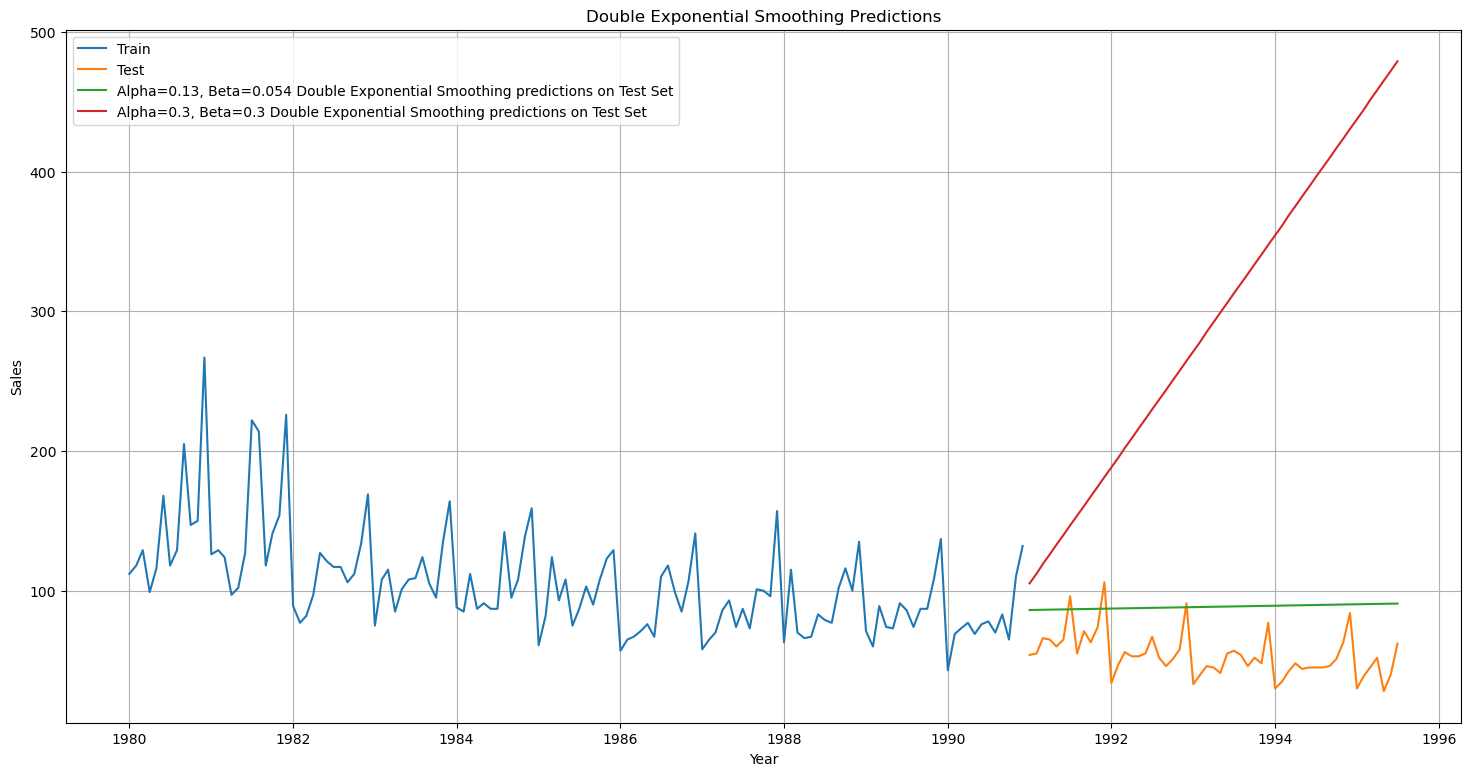

In [96]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(Rose_DES_train['Rose'], label='Train')
plt.plot(Rose_DES_test['Rose'], label='Test')

plt.plot(Rose_DES_test['predict'], label='Alpha=0.13, Beta=0.054 Double Exponential Smoothing predictions on Test Set')

plt.plot(Rose_DES_test['predict', 0.3, 0.3], label='Alpha=0.3, Beta=0.3 Double Exponential Smoothing predictions on Test Set')
plt.title('Double Exponential Smoothing Predictions');
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.grid();

In [97]:
RMSE_Rose_DES_df = pd.DataFrame({'Test RMSE': resultsDf_DES_11.sort_values(by=['Test RMSE'],ascending=True).values[0][3]}
                           ,index=['Alpha=0.3, Beta=0.3, Double Exponential Smoothing'])

RMSE_df = pd.concat([RMSE_df, RMSE_Rose_DES_df])
RMSE_df

,Test RMSE
Linear Regression OnTime,51.451050
2pointTrailingMovingAverage,68.990118
4pointTrailingMovingAverage,46.424083
6pointTrailingMovingAverage,39.147068
9pointTrailingMovingAverage,34.431627
Naive Approach,79.738550
Simple Average Approach,53.480857
"Alpha=0.0987,Simple Exponential Smoothing",36.816905
"Alpha =0.13, Beta=0.054, Double Exponential Smoothing",36.816905
"Alpha=0.3, Beta=0.3, Double Exponential Smoothing",265.591922


### VII. Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [98]:
Rose_TES_train = train.copy()
Rose_TES_test = test.copy()

Rose_TES_model = ExponentialSmoothing(Rose_TES_train['Rose'],trend='additive',seasonal='multiplicative')
Rose_TES_model_autofit = Rose_TES_model.fit()
print(Rose_TES_model_autofit.params)

{'smoothing_level': 0.07132109562890512, 'smoothing_trend': 0.04553831096563722, 'smoothing_seasonal': 8.356711212063695e-07, 'damping_trend': nan, 'initial_level': 134.25655591779326, 'initial_trend': -0.8038265942903572, 'initial_seasons': array([0.83746068, 0.94985307, 1.03812083, 0.90732186, 1.02043162,
       1.11131741, 1.22228039, 1.30104211, 1.23132915, 1.20610008,
       1.40577823, 1.93832412]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [99]:
Rose_TES_test['predict'] = Rose_TES_model_autofit.forecast(steps=len(test))
Rose_TES_test.head()

,Rose,predict
YearMonth,,
1991-01-01,54.0,56.334597
1991-02-01,55.0,63.692059
1991-03-01,66.0,69.388935
1991-04-01,65.0,60.452304
1991-05-01,60.0,67.770362


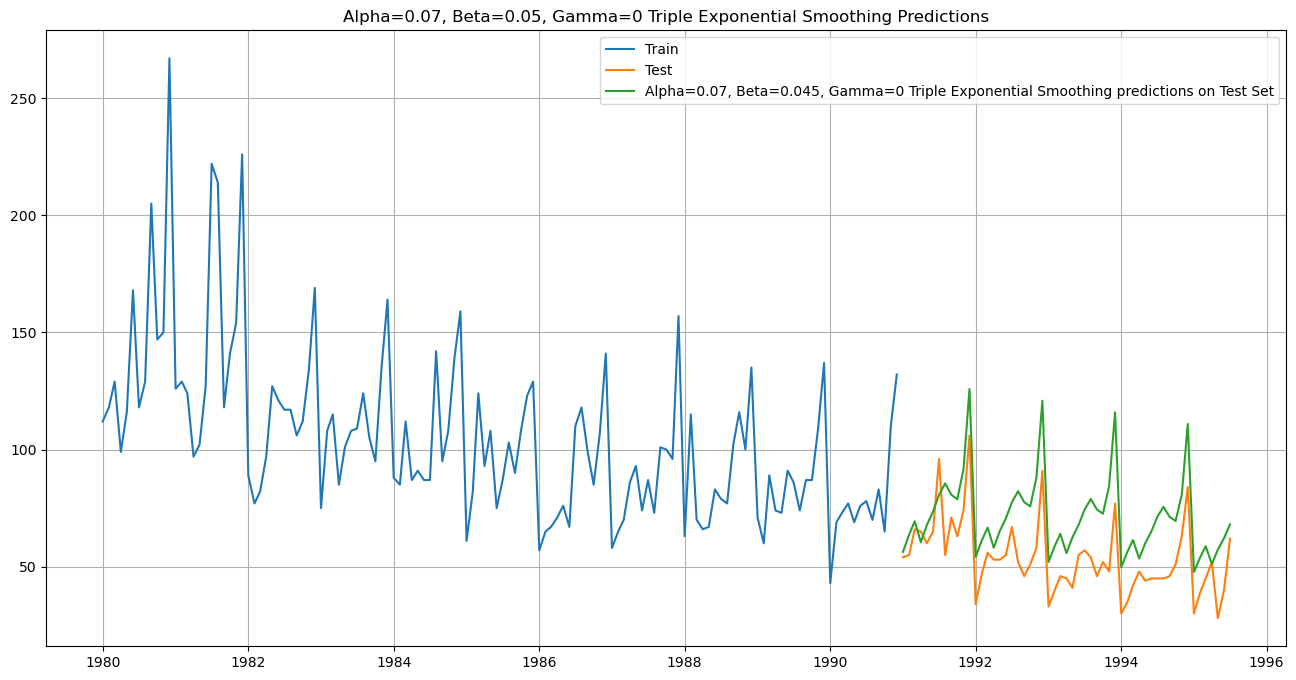

In [101]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(Rose_TES_train['Rose'], label='Train')
plt.plot(Rose_TES_test['Rose'], label='Test')

plt.plot(Rose_TES_test['predict'], label='Alpha=0.07, Beta=0.045, Gamma=0 Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha=0.07, Beta=0.05, Gamma=0 Triple Exponential Smoothing Predictions');

In [103]:
## Test Data

RMSE_rose_model_12 = mean_squared_error(Rose_TES_test['Rose'],Rose_TES_test['predict'],squared=False)
print("For Alpha=0.07, Beta=0405, Gamma=0 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(RMSE_rose_model_10))

For Alpha=0.07, Beta=0405, Gamma=0 Triple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.817


In [104]:
RMSE_Rose_TES_df = pd.DataFrame({'Test RMSE': [RMSE_rose_model_12]}
                           ,index=['Alpha =0.07, Beta=0.045, Gamma=0, Triple Exponential Smoothing'])

RMSE_df = pd.concat([RMSE_df, RMSE_Rose_TES_df])
RMSE_df

,Test RMSE
Linear Regression OnTime,51.451050
2pointTrailingMovingAverage,68.990118
4pointTrailingMovingAverage,46.424083
6pointTrailingMovingAverage,39.147068
9pointTrailingMovingAverage,34.431627
Naive Approach,79.738550
Simple Average Approach,53.480857
"Alpha=0.0987,Simple Exponential Smoothing",36.816905
"Alpha =0.13, Beta=0.054, Double Exponential Smoothing",36.816905
"Alpha=0.3, Beta=0.3, Double Exponential Smoothing",265.591922


#### Setting different alpha and beta values.

**The higher the alpha, the more weightage for the recent observation. That means, what happened recently will happen again.We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.**

In [105]:
## First we will define an empty dataframe to store our values from the loop
resultsDf_TES_13 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_TES_13

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [106]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = Rose_TES_model.fit(smoothing_level=i, smoothing_trend=j, smoothing_seasonal=k, 
                                                       optimized=False, use_brute=True)
            Rose_TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            Rose_TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
            
            rmse_model_train_i_j_k = mean_squared_error(Rose_TES_train['Rose'],Rose_TES_train['predict',i,j,k],squared=False)
            
            rmse_model_test_i_j_k = mean_squared_error(Rose_TES_test['Rose'],Rose_TES_test['predict',i,j,k],squared=False)
            
            resultsDf_TES_13 = resultsDf_TES_13.append({'Alpha Values':i,'Beta Values':j, 'Gamma Values': k,
                                                        'Train RMSE':rmse_model_train_i_j_k
                                                        ,'Test RMSE':rmse_model_test_i_j_k}, ignore_index=True)

In [107]:
resultsDf_TES_13.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
1,0.3,0.3,0.4,24.588120,1.015854e+01
9,0.3,0.4,0.4,25.599445,1.036148e+01
80,0.4,0.5,0.3,26.917917,1.337520e+01
24,0.3,0.6,0.3,25.815213,1.549725e+01
194,0.6,0.3,0.5,31.758130,1.724982e+01
...,...,...,...,...,...
189,0.5,1.0,0.8,588.520462,1.774680e+05
229,0.6,0.7,0.8,200.708579,2.555513e+05
496,1.0,0.9,0.3,4978.410761,2.976504e+05
494,1.0,0.8,0.9,6456.216893,3.847832e+05


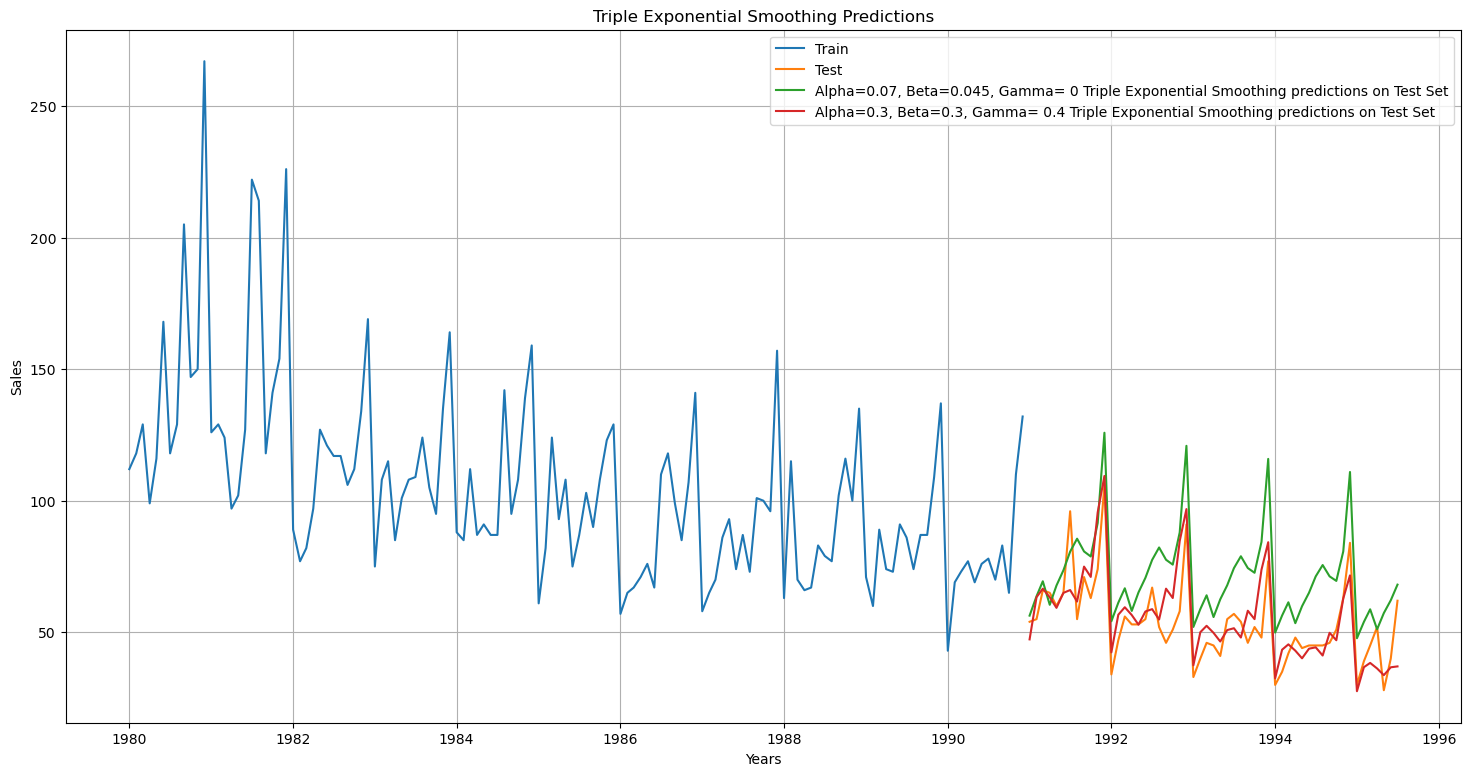

In [108]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(Rose_TES_train['Rose'], label='Train')
plt.plot(Rose_TES_test['Rose'], label='Test')

plt.plot(Rose_TES_test['predict'], label='Alpha=0.07, Beta=0.045, Gamma= 0 Triple Exponential Smoothing predictions on Test Set')

plt.plot(Rose_TES_test['predict', 0.3, 0.3, 0.4], label='Alpha=0.3, Beta=0.3, Gamma= 0.4 Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.title('Triple Exponential Smoothing Predictions')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.grid();

In [109]:
RMSE_Rose_TES_df = pd.DataFrame({'Test RMSE': resultsDf_TES_13.sort_values(by=['Test RMSE'],ascending=True).values[0][4]}
                           ,index=['Alpha=0.3, Beta=0.3, Gamma=0.4, Triple Exponential Smoothing'])

RMSE_df = pd.concat([RMSE_df, RMSE_Rose_TES_df])
RMSE_df

,Test RMSE
Linear Regression OnTime,51.451050
2pointTrailingMovingAverage,68.990118
4pointTrailingMovingAverage,46.424083
6pointTrailingMovingAverage,39.147068
9pointTrailingMovingAverage,34.431627
Naive Approach,79.738550
Simple Average Approach,53.480857
"Alpha=0.0987,Simple Exponential Smoothing",36.816905
"Alpha =0.13, Beta=0.054, Double Exponential Smoothing",36.816905
"Alpha=0.3, Beta=0.3, Double Exponential Smoothing",265.591922


### 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

**<font color='blue'>Dickey-Fuller Test</font>** - Dicky Fuller Test on the timeseries is run to check for stationarity of data. 

- **Null Hypothesis $H_{0}$**: Time Series is non-stationary.
- **Alternate Hypothesis $𝑯_{𝒂}$**: Time Series is stationary.

**So if p-value < 0.05 then null hypothesis is rejected: It implies that Time Series is Stationary.**


**If p-value > 0.05 then null hypothesis can't be rejected: It implies that Time Series is non Stationary.**

In [110]:
## Test for stationarity of the series - Dicky Fuller test
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

#### I. Test of Stationary for complete dataset

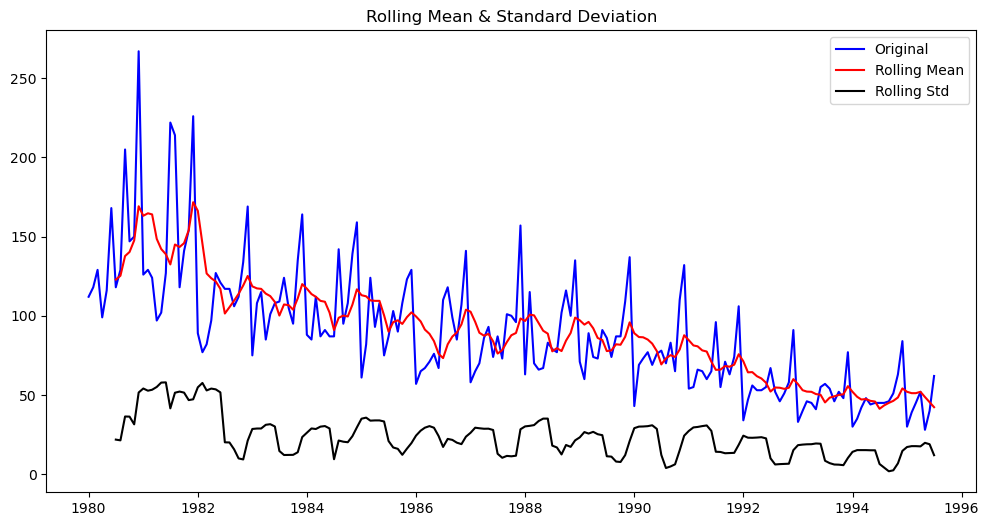

Results of Dickey-Fuller Test:
Test Statistic                  -1.874856
p-value                          0.343981
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [111]:
test_stationarity(treated_rose_df['Rose'])

**Since p-value of 0.344 > 0.05. At significant level of 0.05, the Time Series is non-stationary.**

**Let us take a difference of order 1 and check whether the Time Series is stationary or not.**

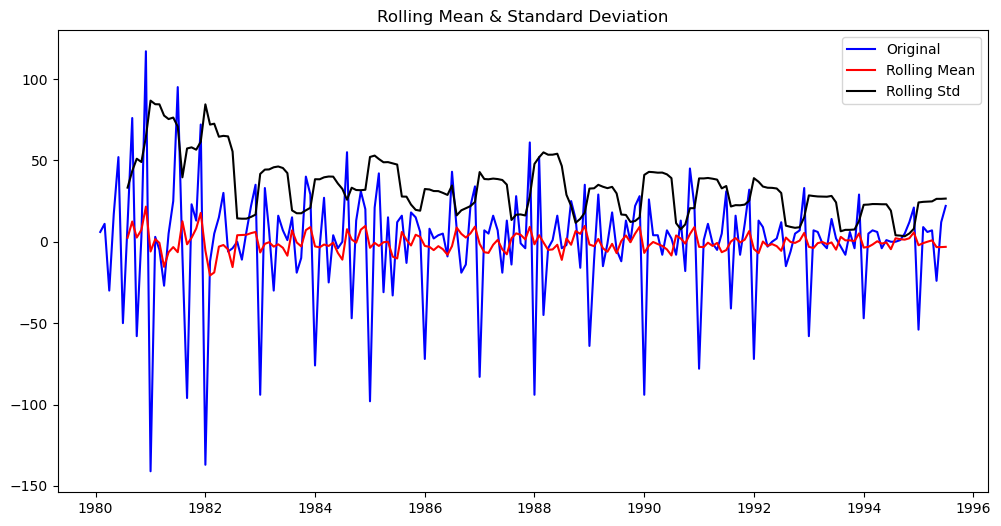

Results of Dickey-Fuller Test:
Test Statistic                -8.044139e+00
p-value                        1.813580e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [112]:
test_stationarity(treated_rose_df['Rose'].diff().dropna())

**With a difference of order 1 and p-value is less than significance level of 0.05, the Time Series is stationary.**

**We see that after taking a difference of order 1 the series have become stationary at $\alpha$ = 0.05.**

#### II. Test of Stationary for Train dataset

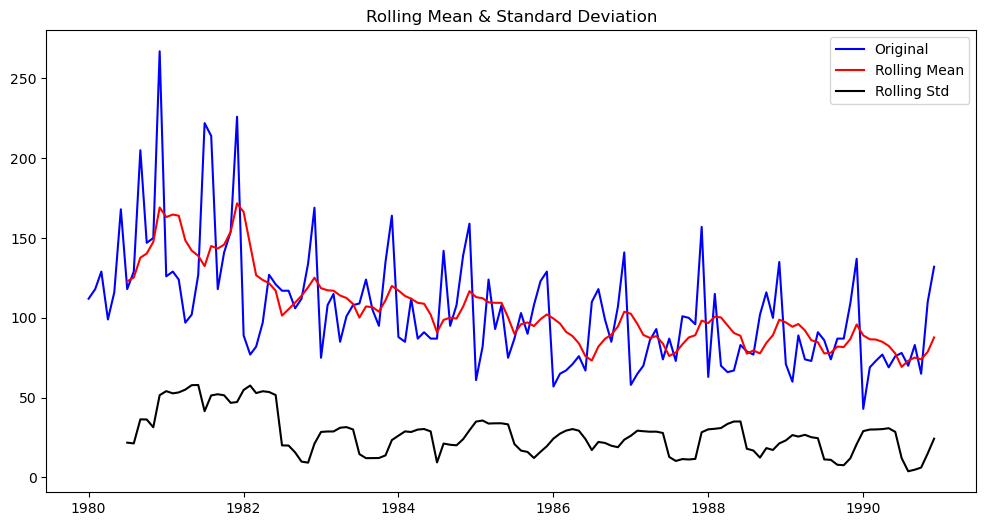

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [113]:
test_stationarity(train['Rose'])

**Since p-value of 0.22 > 0.05. At significant level of 0.05, the Time Series is non-stationary.**

**Let us take a difference of order 1 and check whether the Time Series is stationary or not.**

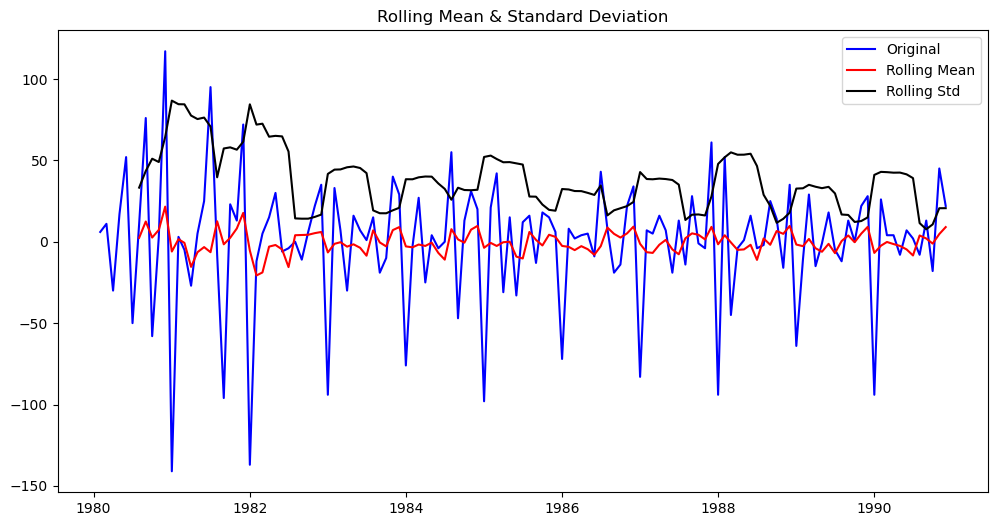

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [114]:
test_stationarity(train['Rose'].diff().dropna())

**With a difference of order 1 and p-value is less than significance level of 0.05, the Time Series is stationary.**

**We see that after taking a difference of order 1 the series have become stationary.**

### Plot the Autocorrelation function plots on the whole data.

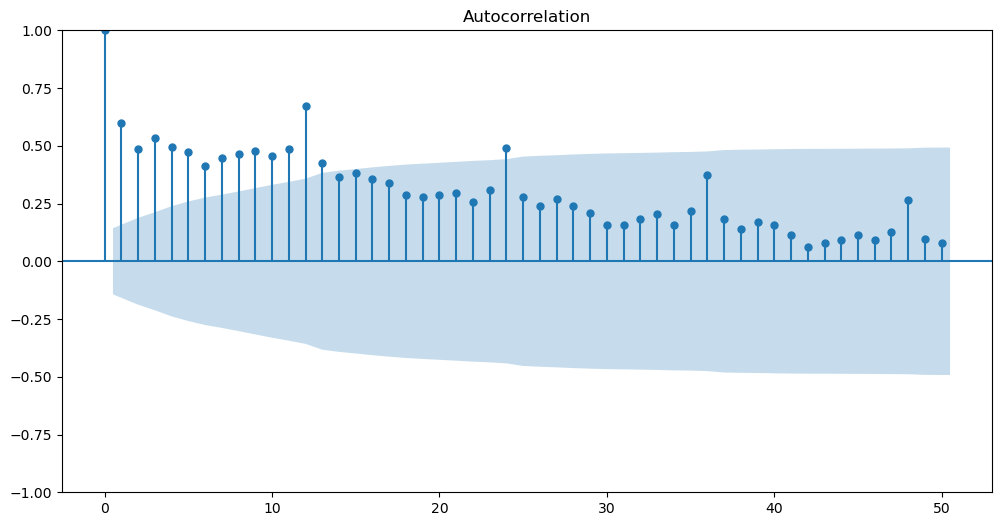

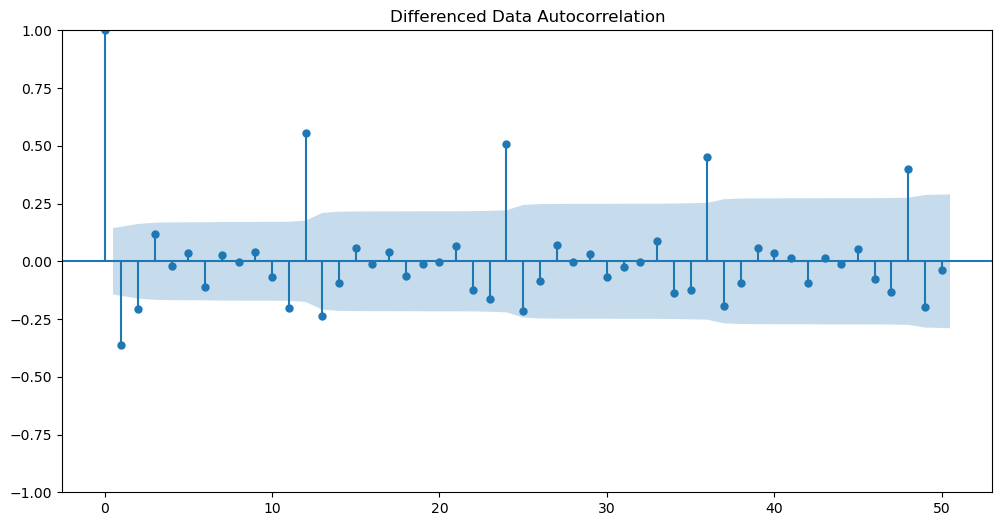

In [116]:
plot_acf(treated_rose_df['Rose'],lags=50)
plot_acf(treated_rose_df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

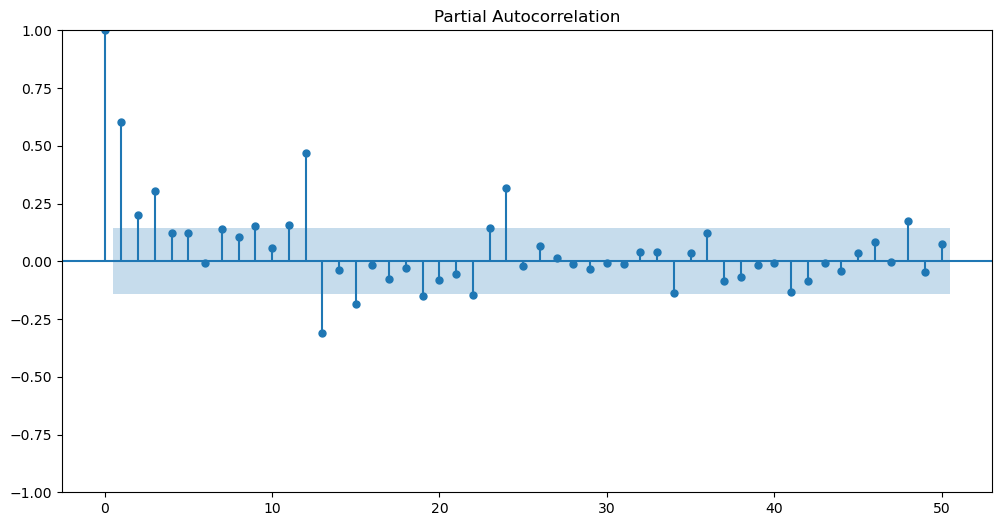

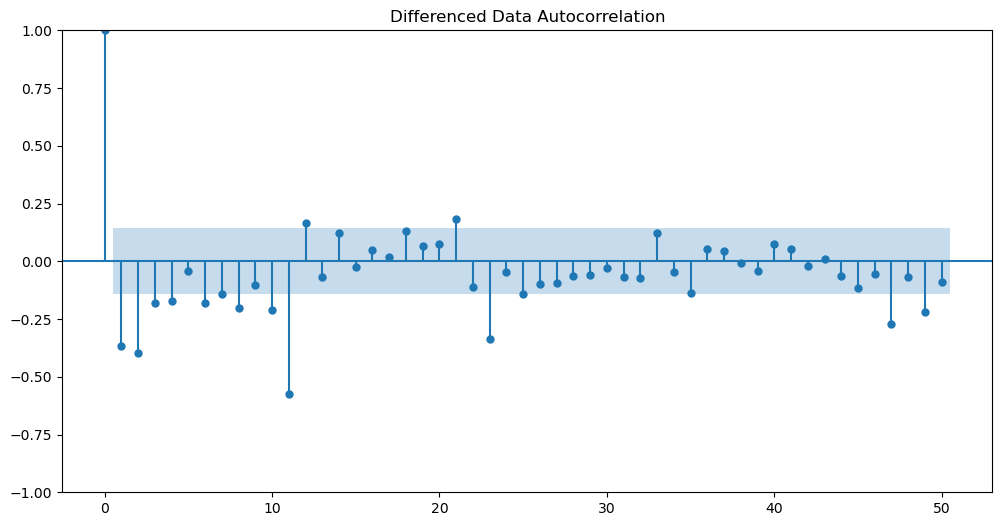

In [117]:
plot_pacf(treated_rose_df['Rose'],lags=50)
plot_pacf(treated_rose_df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

**ACF Plots gives value of 2. q=2 and PACF gives of 4. Values of p=4 will be suitable for model**

### 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

### I.ARIMA

In [120]:
Rose_ARIMA_train = train.copy()
Rose_ARIMA_test = test.copy()

In [121]:
import itertools
p = q = range(0, 7)
d= range(1,3)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (0, 1, 4)
Model: (0, 1, 5)
Model: (0, 1, 6)
Model: (0, 2, 0)
Model: (0, 2, 1)
Model: (0, 2, 2)
Model: (0, 2, 3)
Model: (0, 2, 4)
Model: (0, 2, 5)
Model: (0, 2, 6)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (1, 1, 4)
Model: (1, 1, 5)
Model: (1, 1, 6)
Model: (1, 2, 0)
Model: (1, 2, 1)
Model: (1, 2, 2)
Model: (1, 2, 3)
Model: (1, 2, 4)
Model: (1, 2, 5)
Model: (1, 2, 6)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (2, 1, 4)
Model: (2, 1, 5)
Model: (2, 1, 6)
Model: (2, 2, 0)
Model: (2, 2, 1)
Model: (2, 2, 2)
Model: (2, 2, 3)
Model: (2, 2, 4)
Model: (2, 2, 5)
Model: (2, 2, 6)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)
Model: (3, 1, 4)
Model: (3, 1, 5)
Model: (3, 1, 6)
Model: (3, 2, 0)
Model: (3, 2, 1)
Model: (3, 2, 2)
Model: (3, 2, 3)
Model: (3, 2, 4)
Model: (3, 2, 5)
Model: (3, 2, 6)
Model: (4, 1, 0)
Mod

In [122]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [123]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(Rose_ARIMA_train['Rose'],order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748315
ARIMA(0, 1, 2) - AIC:1279.6715288535743
ARIMA(0, 1, 3) - AIC:1280.5453761734657
ARIMA(0, 1, 4) - AIC:1281.6766982143938
ARIMA(0, 1, 5) - AIC:1283.663514775412
ARIMA(0, 1, 6) - AIC:1285.2343699605553
ARIMA(0, 2, 0) - AIC:1453.6864098008932
ARIMA(0, 2, 1) - AIC:1330.8639795119993
ARIMA(0, 2, 2) - AIC:1281.5704600486215
ARIMA(0, 2, 3) - AIC:1285.200999453327
ARIMA(0, 2, 4) - AIC:1278.4309661906134
ARIMA(0, 2, 5) - AIC:1281.8600576428419
ARIMA(0, 2, 6) - AIC:1281.1972088011562
ARIMA(1, 1, 0) - AIC:1317.3503105381526
ARIMA(1, 1, 1) - AIC:1280.5742295380046
ARIMA(1, 1, 2) - AIC:1279.8707234231906
ARIMA(1, 1, 3) - AIC:1281.8707223310007
ARIMA(1, 1, 4) - AIC:1279.605263284227
ARIMA(1, 1, 5) - AIC:1283.3103338211263
ARIMA(1, 1, 6) - AIC:1278.3708483574314
ARIMA(1, 2, 0) - AIC:1407.4092755438164
ARIMA(1, 2, 1) - AIC:1315.7936974080335
ARIMA(1, 2, 2) - AIC:1278.0583958898687
ARIMA(1, 2, 3) - AIC:1284.8286757936014
ARI

In [124]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
89,"(6, 1, 5)",1258.504272
48,"(3, 1, 6)",1259.706924
87,"(6, 1, 3)",1267.909079
86,"(6, 1, 2)",1269.128038
88,"(6, 1, 4)",1271.633617
...,...,...
0,"(0, 1, 0)",1333.154673
49,"(3, 2, 0)",1348.181878
35,"(2, 2, 0)",1364.692677
21,"(1, 2, 0)",1407.409276


In [125]:
auto_ARIMA = ARIMA(Rose_ARMA_train['Rose'], order=(6,1,5))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(6, 1, 5)   Log Likelihood                -617.252
Date:                Sun, 03 Sep 2023   AIC                           1258.504
Time:                        20:54:25   BIC                           1293.007
Sample:                    01-01-1980   HQIC                          1272.524
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0588      0.106     -0.556      0.578      -0.266       0.149
ar.L2          0.6089      0.108      5.630      0.000       0.397       0.821
ar.L3          0.0560      0.105      0.533      0.5

In [126]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

Rose_RMSE_ARIMA = mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
print(Rose_RMSE_ARIMA)

31.44406178937524


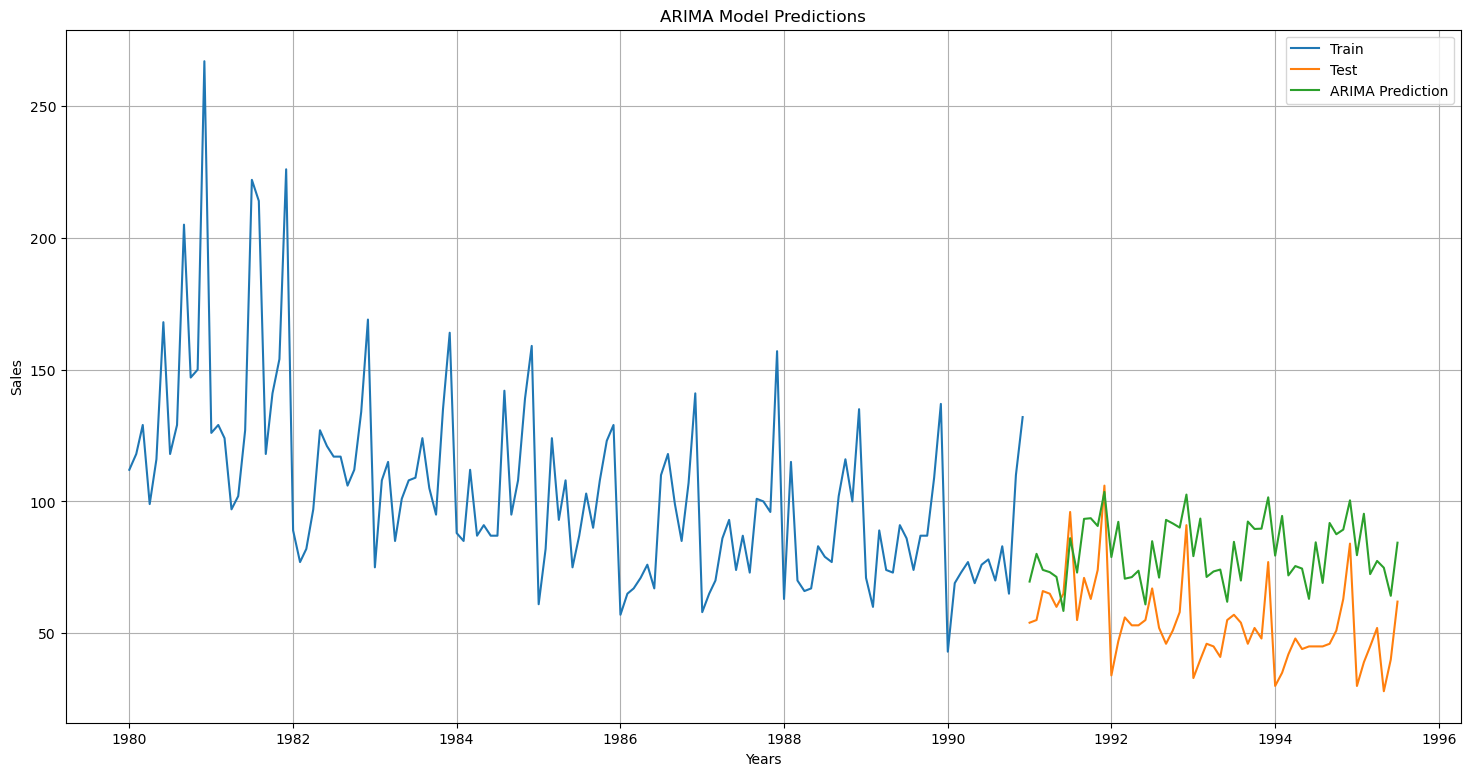

In [128]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(Rose_ARIMA_train['Rose'], label='Train')
plt.plot(Rose_ARIMA_test['Rose'], label='Test')

plt.plot(predicted_auto_ARIMA, label='ARIMA Prediction')

plt.legend(loc='best')
plt.title('ARIMA Model Predictions')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.grid();

In [127]:
RMSE_Rose_ARIMA_df = pd.DataFrame({'Test RMSE': Rose_RMSE_ARIMA}
                           ,index=['ARIMA Model (6,1,5)'])

RMSE_df = pd.concat([RMSE_df, RMSE_Rose_ARIMA_df])
RMSE_df

,Test RMSE
Linear Regression OnTime,51.451050
2pointTrailingMovingAverage,68.990118
4pointTrailingMovingAverage,46.424083
6pointTrailingMovingAverage,39.147068
9pointTrailingMovingAverage,34.431627
Naive Approach,79.738550
Simple Average Approach,53.480857
"Alpha=0.0987,Simple Exponential Smoothing",36.816905
"Alpha =0.13, Beta=0.054, Double Exponential Smoothing",36.816905
"Alpha=0.3, Beta=0.3, Double Exponential Smoothing",265.591922


### III. SARIMA

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

**We see that there can be a seasonality of 12.**

In [129]:
Rose_SARIMA_train = train.copy()
Rose_SARIMA_test = test.copy()

In [130]:
import itertools
p = range(2,5)
q = range(1,3)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    for j in range(1, len(model_pdq)):
        print('Model: {}{}'.format(pdq[i], model_pdq[j]))

Examples of some parameter combinations for Model...
Model: (2, 1, 2)(2, 1, 2, 12)
Model: (2, 1, 2)(3, 1, 1, 12)
Model: (2, 1, 2)(3, 1, 2, 12)
Model: (2, 1, 2)(4, 1, 1, 12)
Model: (2, 1, 2)(4, 1, 2, 12)
Model: (3, 1, 1)(2, 1, 2, 12)
Model: (3, 1, 1)(3, 1, 1, 12)
Model: (3, 1, 1)(3, 1, 2, 12)
Model: (3, 1, 1)(4, 1, 1, 12)
Model: (3, 1, 1)(4, 1, 2, 12)
Model: (3, 1, 2)(2, 1, 2, 12)
Model: (3, 1, 2)(3, 1, 1, 12)
Model: (3, 1, 2)(3, 1, 2, 12)
Model: (3, 1, 2)(4, 1, 1, 12)
Model: (3, 1, 2)(4, 1, 2, 12)
Model: (4, 1, 1)(2, 1, 2, 12)
Model: (4, 1, 1)(3, 1, 1, 12)
Model: (4, 1, 1)(3, 1, 2, 12)
Model: (4, 1, 1)(4, 1, 1, 12)
Model: (4, 1, 1)(4, 1, 2, 12)
Model: (4, 1, 2)(2, 1, 2, 12)
Model: (4, 1, 2)(3, 1, 1, 12)
Model: (4, 1, 2)(3, 1, 2, 12)
Model: (4, 1, 2)(4, 1, 1, 12)
Model: (4, 1, 2)(4, 1, 2, 12)


In [131]:
len(pdq) * len(model_pdq)

36

In [132]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [133]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(Rose_SARIMA_train['Rose'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit()
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(2, 1, 1)x(2, 1, 1, 12) - AIC:784.8928050897073
SARIMA(2, 1, 1)x(2, 1, 2, 12) - AIC:785.8335674040347
SARIMA(2, 1, 1)x(3, 1, 1, 12) - AIC:687.9965312630613
SARIMA(2, 1, 1)x(3, 1, 2, 12) - AIC:688.9134525744569
SARIMA(2, 1, 1)x(4, 1, 1, 12) - AIC:593.3243581159342
SARIMA(2, 1, 1)x(4, 1, 2, 12) - AIC:594.1662407539108
SARIMA(2, 1, 2)x(2, 1, 1, 12) - AIC:783.7036522724571
SARIMA(2, 1, 2)x(2, 1, 2, 12) - AIC:778.5515138948598
SARIMA(2, 1, 2)x(3, 1, 1, 12) - AIC:688.264401912798
SARIMA(2, 1, 2)x(3, 1, 2, 12) - AIC:690.9226357503406
SARIMA(2, 1, 2)x(4, 1, 1, 12) - AIC:595.3358790182966
SARIMA(2, 1, 2)x(4, 1, 2, 12) - AIC:591.1508978173651
SARIMA(3, 1, 1)x(2, 1, 1, 12) - AIC:777.3603966748005
SARIMA(3, 1, 1)x(2, 1, 2, 12) - AIC:777.5853448601574
SARIMA(3, 1, 1)x(3, 1, 1, 12) - AIC:681.3628070028242
SARIMA(3, 1, 1)x(3, 1, 2, 12) - AIC:682.3361978615351
SARIMA(3, 1, 1)x(4, 1, 1, 12) - AIC:586.1440693188491
SARIMA(3, 1, 1)x(4, 1, 2, 12) - AIC:583.7961170497642
SARIMA(3, 1, 2)x(2, 1, 1, 12)

In [134]:
SARIMA_AIC.sort_values(by=['AIC']).head(10)

,param,seasonal,AIC
34,"(4, 1, 2)","(4, 1, 1, 12)",579.368256
28,"(4, 1, 1)","(4, 1, 1, 12)",579.729575
29,"(4, 1, 1)","(4, 1, 2, 12)",581.092256
35,"(4, 1, 2)","(4, 1, 2, 12)",581.321916
17,"(3, 1, 1)","(4, 1, 2, 12)",583.796117
16,"(3, 1, 1)","(4, 1, 1, 12)",586.144069
23,"(3, 1, 2)","(4, 1, 2, 12)",586.492638
22,"(3, 1, 2)","(4, 1, 1, 12)",587.578117
11,"(2, 1, 2)","(4, 1, 2, 12)",591.150898
4,"(2, 1, 1)","(4, 1, 1, 12)",593.324358


In [135]:
import statsmodels.api as sm

SARIMA_model_01 = sm.tsa.statespace.SARIMAX(Rose_SARIMA_train['Rose'],
                                order=(4,1,2),
                                seasonal_order=(4, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA_model_01 = SARIMA_model_01.fit()
print(results_SARIMA_model_01.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(4, 1, 2, 12)   Log Likelihood                -277.661
Date:                            Sun, 03 Sep 2023   AIC                            581.322
Time:                                    21:10:34   BIC                            609.983
Sample:                                01-01-1980   HQIC                           592.663
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9745      0.199     -4.900      0.000      -1.364      -0.585
ar.L2         -0.1125      0.285   

In [136]:
predicted_auto_SARIMA = results_SARIMA_model_01.forecast(steps=len(test))

Rose_RMSE_SARIMA = mean_squared_error(test['Rose'],predicted_auto_SARIMA,squared=False)
print(Rose_RMSE_SARIMA)

17.535970204885757


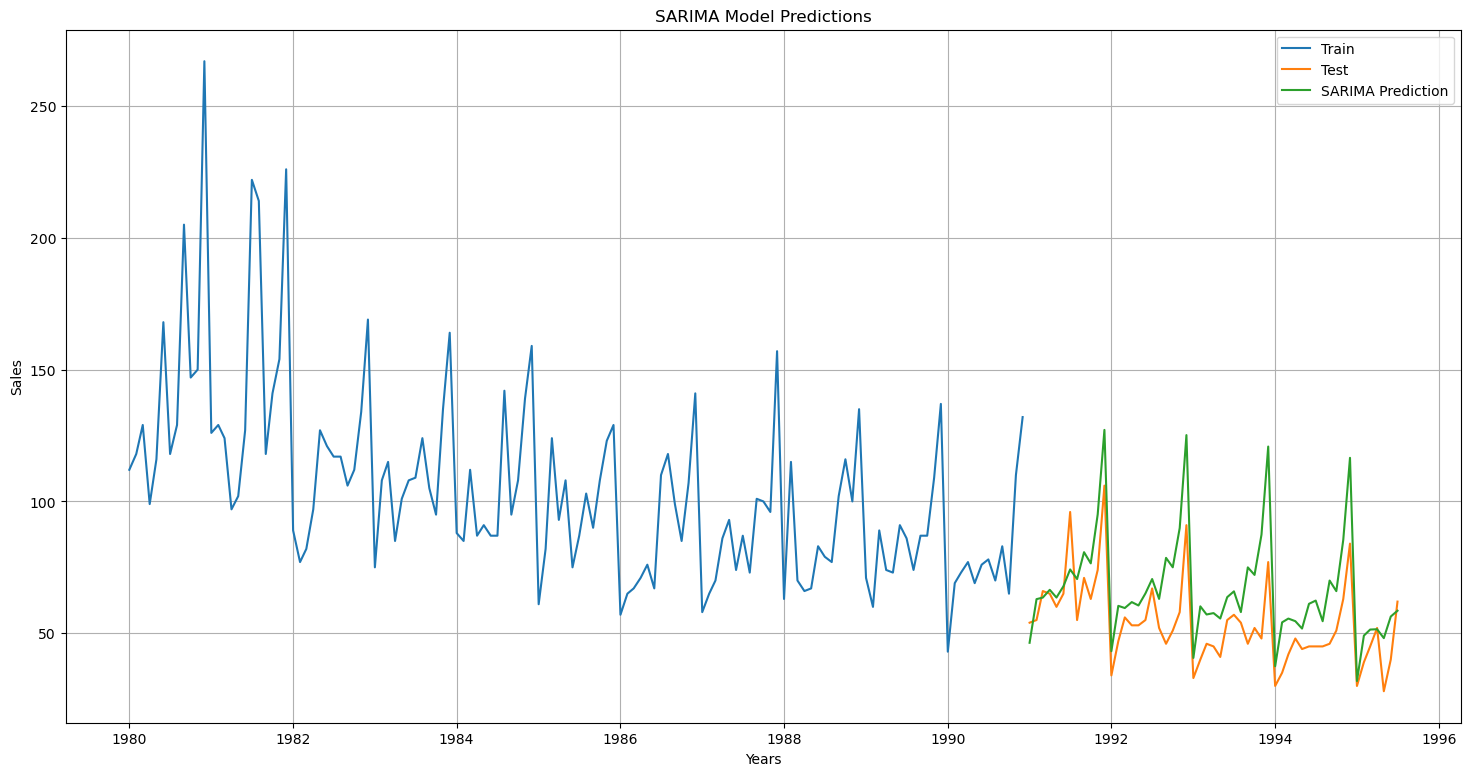

In [137]:
plt.figure(figsize=(18,9))
plt.plot(Rose_SARIMA_train['Rose'], label='Train')
plt.plot(Rose_SARIMA_test['Rose'], label='Test')

plt.plot(predicted_auto_SARIMA, label='SARIMA Prediction')

plt.legend(loc='best')
plt.title('SARIMA Model Predictions')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.grid();

In [138]:
RMSE_Rose_SARIMA_df = pd.DataFrame({'Test RMSE': Rose_RMSE_SARIMA}
                           ,index=['SARIMA Model (4, 1, 2)x(4, 1, 2, 12)'])

RMSE_df = pd.concat([RMSE_df, RMSE_Rose_SARIMA_df])
RMSE_df

,Test RMSE
Linear Regression OnTime,51.451050
2pointTrailingMovingAverage,68.990118
4pointTrailingMovingAverage,46.424083
6pointTrailingMovingAverage,39.147068
9pointTrailingMovingAverage,34.431627
Naive Approach,79.738550
Simple Average Approach,53.480857
"Alpha=0.0987,Simple Exponential Smoothing",36.816905
"Alpha =0.13, Beta=0.054, Double Exponential Smoothing",36.816905
"Alpha=0.3, Beta=0.3, Double Exponential Smoothing",265.591922


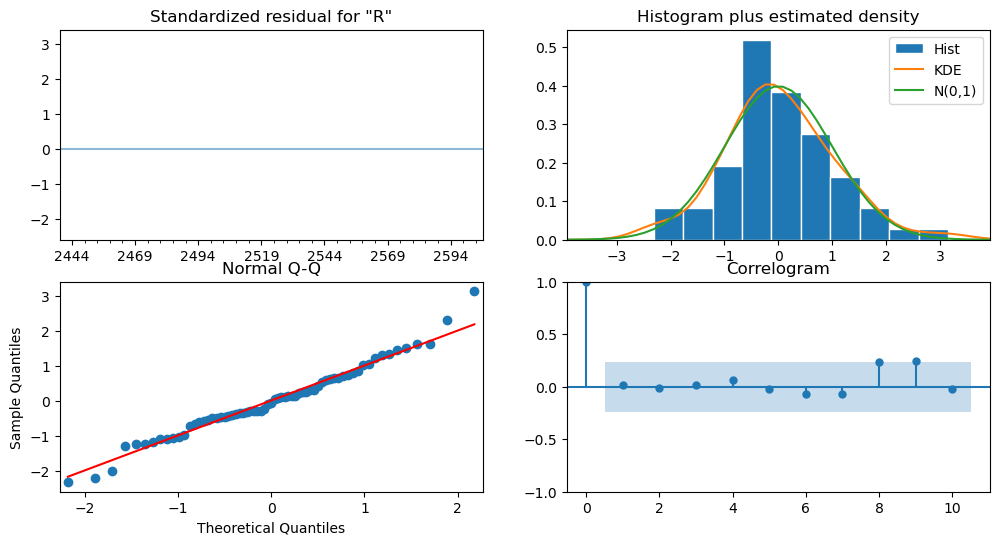

In [139]:
results_SARIMA_model_01.plot_diagnostics()
plt.show()

### 7. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [119]:
RMSE_df.sort_values(by='Test RMSE', ascending=True)

,Test RMSE
"Alpha=0.3, Beta=0.3, Gamma=0.4, Triple Exponential Smoothing",10.158543
"SARIMA Model (4, 1, 2)x(4, 1, 2, 12)",17.535970
"Alpha =0.13, Beta=0.054,Gamma=0, Triple Exponential Smoothing",20.216957
"ARMA Model (6,1,5)",31.444062
"ARIMA Model (6,1,5)",31.444062
9pointTrailingMovingAverage,34.431627
"Alpha=0.0987,Simple Exponential Smoothing",36.816905
"Alpha =0.13, Beta=0.054, Double Exponential Smoothing",36.816905
6pointTrailingMovingAverage,39.147068
4pointTrailingMovingAverage,46.424083


## 8. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands

In [140]:
Rose_full_data_model = ExponentialSmoothing(treated_rose_df['Rose'],
                                            trend='additive',
                                            seasonal='multiplicative').fit(smoothing_level=0.3, 
                                                                           smoothing_trend=0.3, 
                                                                           smoothing_seasonal=0.4)

In [141]:
RMSE_Rose_full_data_model = mean_squared_error(treated_rose_df['Rose'],Rose_full_data_model.fittedvalues,squared=False)

print('RMSE:',RMSE_Rose_full_data_model)

RMSE: 21.014406336170964


In [142]:
Predicted_Rose_Wine_Sales = Rose_full_data_model.forecast(steps=12)

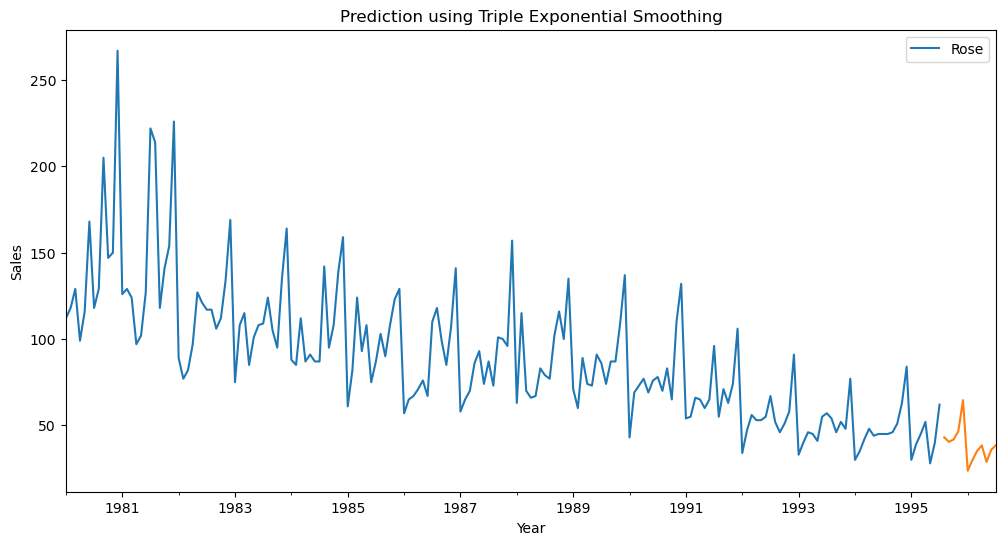

In [143]:
treated_rose_df.plot()
Predicted_Rose_Wine_Sales.plot()
plt.title('Prediction using Triple Exponential Smoothing')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

In [144]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
Predicted_Rose_Wine_Sales_df = pd.DataFrame({'Lower_CI':Predicted_Rose_Wine_Sales - 1.96*np.std(Rose_full_data_model.resid,ddof=1),
                                              'Prediction':Predicted_Rose_Wine_Sales,
                                              'Upper_CI': Predicted_Rose_Wine_Sales + 1.96*np.std(Rose_full_data_model.resid,ddof=1)})
Predicted_Rose_Wine_Sales_df

,Lower_CI,Prediction,Upper_CI
1995-08-01,1.792135,43.056948,84.321761
1995-09-01,-0.834111,40.430702,81.695515
1995-10-01,0.584036,41.848849,83.113662
1995-11-01,5.344860,46.609673,87.874486
1995-12-01,23.350213,64.615026,105.879839
1996-01-01,-17.550414,23.714398,64.979211
1996-02-01,-11.411849,29.852964,71.117777
1996-03-01,-6.100641,35.164172,76.428985
1996-04-01,-2.884735,38.380078,79.644891
1996-05-01,-12.481521,28.783292,70.048105


In [145]:
Predicted_Rose_Wine_Sales_df['Prediction']

1995-08-01    43.056948
1995-09-01    40.430702
1995-10-01    41.848849
1995-11-01    46.609673
1995-12-01    64.615026
1996-01-01    23.714398
1996-02-01    29.852964
1996-03-01    35.164172
1996-04-01    38.380078
1996-05-01    28.783292
1996-06-01    35.795701
1996-07-01    38.451134
Freq: MS, Name: Prediction, dtype: float64

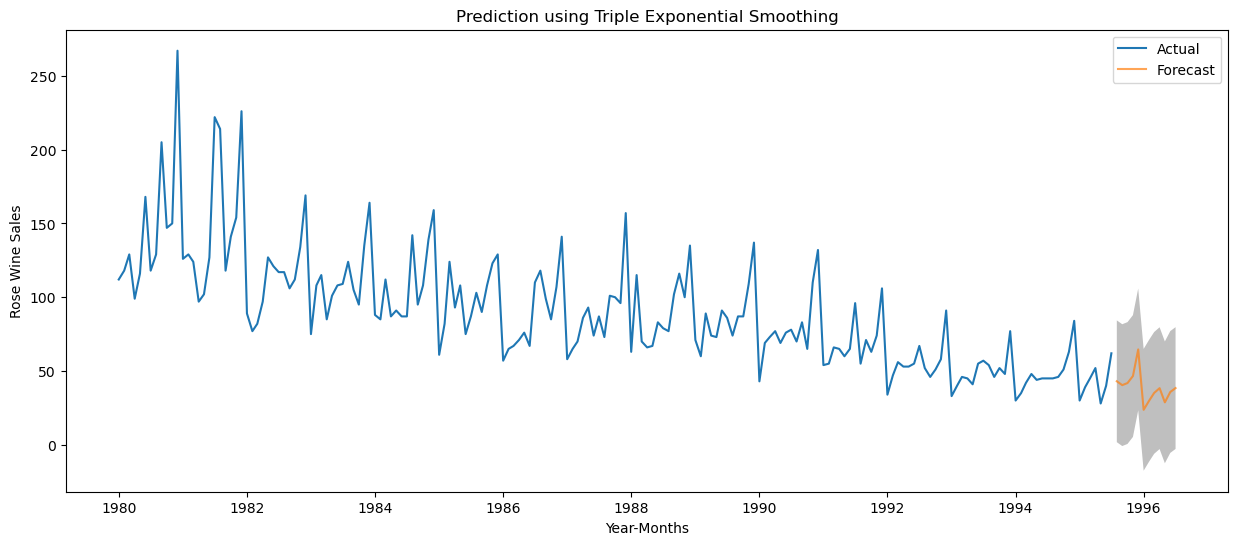

In [146]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 6

# plot the forecast along with the confidence band
fig, ax = plt.subplots(1)
ax.plot(treated_rose_df, label='Actual')
ax.plot(Predicted_Rose_Wine_Sales_df['Prediction'], label='Forecast', alpha=0.7)
ax.fill_between(x=Predicted_Rose_Wine_Sales_df.index, y1=Predicted_Rose_Wine_Sales_df['Lower_CI'], 
                  y2=Predicted_Rose_Wine_Sales_df['Upper_CI'], facecolor='k', alpha=.25)
plt.xlabel('Year-Months')
plt.ylabel('Rose Wine Sales')
plt.title('Prediction using Triple Exponential Smoothing')
plt.legend(loc='best')
plt.show()